# Evaluation Project: Census Income
    
Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.

2.Controls for Hispanic Origin by age and sex.

3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# By: Udit Lakhoria

Importing important libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
ds=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
ds.shape

(32560, 15)

# Our dataset contains 32560 rows and 15 columns

let's look into the columns to get a better insight about the dataset

In [4]:
ds.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Observations:
    
Most of the columns has a self explantory Names. Remaining are explained below

Fnlwgt: Sampling weight

Education_num: Numbers of year of Education


# Let's check the intregity of data.

1.Check the null values 

2. Check the duplicate values if present


In [8]:
#Checking null values
ds.isin([' ','NA','-']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
ds.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [9]:
#Replacing ? mark with the nan value
ds=ds.replace(' ?',np.NaN)

Now lets check the duplicate values present in the data. As dataset is to big it may contain soe duplicate values

In [11]:
ds.duplicated().sum()

24

There are 24 duplicate values present in the dataset. That needs to be dropped

In [14]:
ds.drop_duplicates(keep='last', inplace=True)

In [15]:
ds.shape

(32536, 15)

Now the duplicate rows are dropped

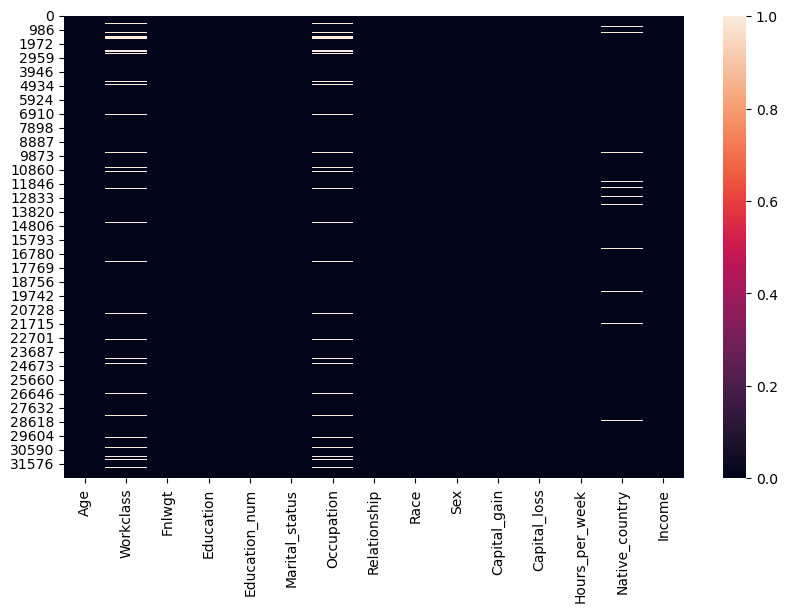

In [17]:
#Checking Missing Value
plt.figure(figsize=(10, 6))
sns.heatmap(ds.isnull())
plt.show()

Observation:
    
There are missing values present in the workclass, occupation and Native Country columns

In [18]:
miss_val = ds.isnull().sum().sort_values(ascending = False)
percent_miss_val =(miss_val/len(ds))*100
print(pd.concat([miss_val, percent_miss_val], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


As we have noticed in the heatmap. it is now confirmed that 1843, 1836, 582 missing values are present in the occupation, workclass, and native country respectively

In [21]:
#Check the datatypes of the columns
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


There are 6 integer datatype column and 9 object type columns present in the dataset

let's segregate the data. Integer data into one variable and Object data into another

In [22]:
num=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
cat=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

Workclass, occupation, native country columns are categorical data. so we need to imputate it with mode of the data present in the respectice columns

In [23]:
ds['Occupation'].fillna(ds['Occupation'].mode()[0],inplace=True)
ds['Workclass'].fillna(ds['Workclass'].mode()[0],inplace=True)
ds['Native_country'].fillna(ds['Native_country'].mode()[0],inplace=True)

Again checking the missing values

In [24]:
missing_values = ds.isnull().sum().sort_values(ascending = False)
missing_values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

  Now all the missing values are removed

In [28]:
ds.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

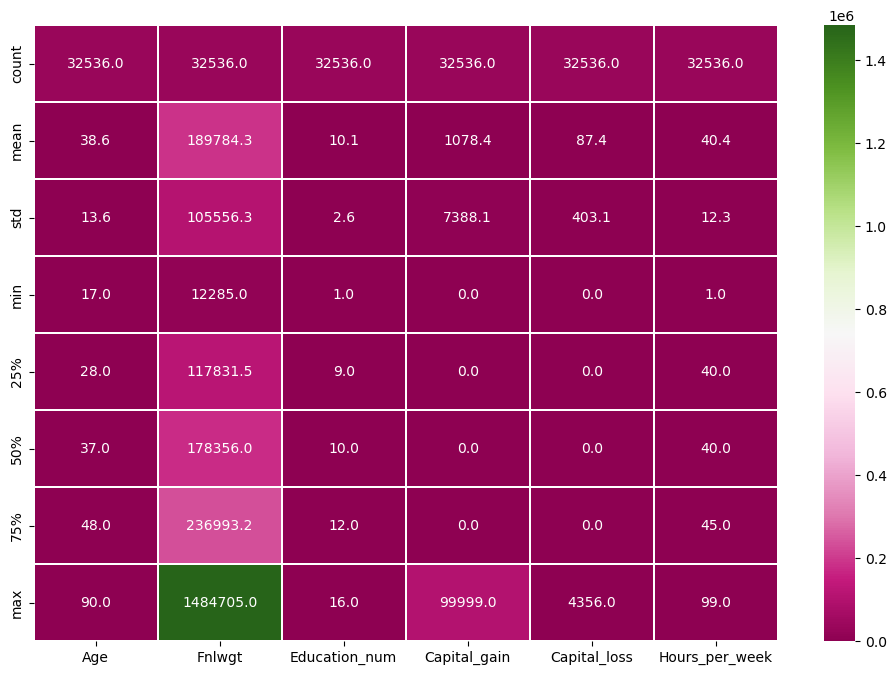

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(ds.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

# Observation:
    
The dataset contains individuals with ages ranging from 19 to 90, with an average age of 37.

The average amount of time spent in school is 10 years, with the smallest and largest amounts being 1 and 16 years, respectively.

The greatest capital gain is 99999, while the least and average capital gain are both 0. This looks strange; perhaps there was a data gathering error.

The range of hours worked each week is 1 to 99, with an average of 40 hours.

In [30]:
#Enlisting Value counts & Sub-categories is a good place to start when exploring categorial aspects
for i in cat:
    print(i)
    print(ds[i].value_counts())
   

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       5979
 Craft-repair         40

# Exploratory Data Analysis

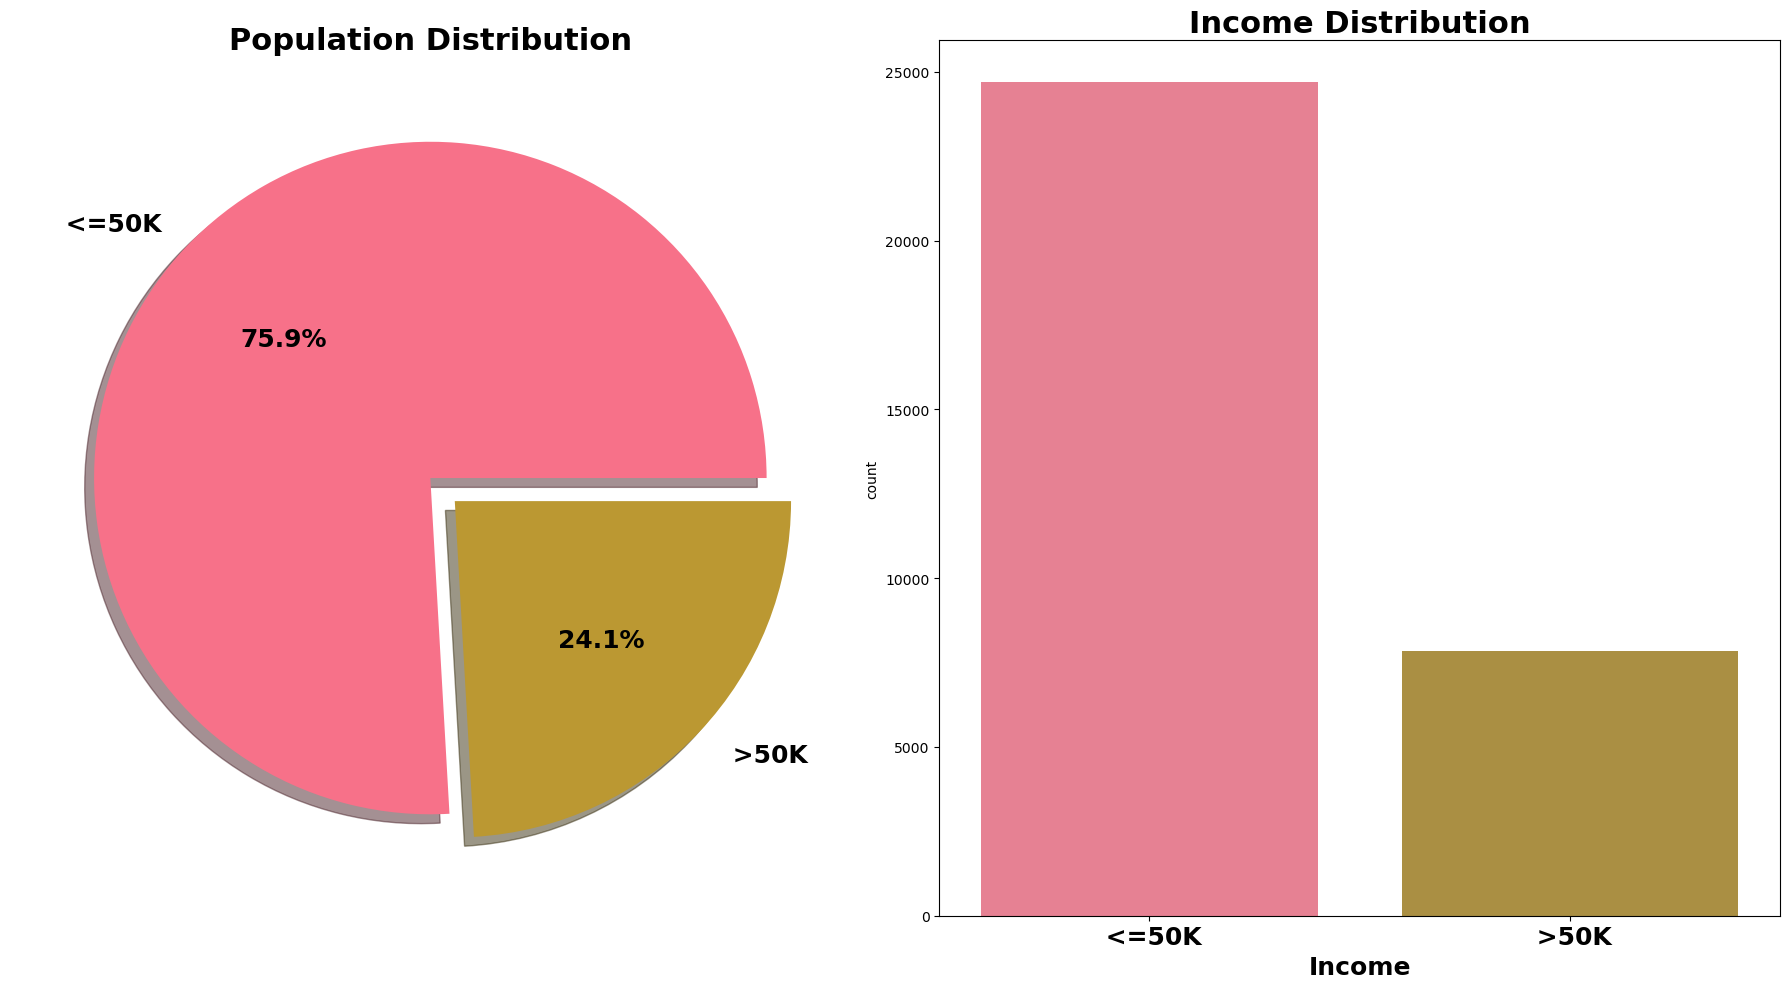

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,10))
ds['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Income',data=ds,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

# Observation:
    
24697 individuals, or 75.9% of the population, make less than 50,000 annually.

We must forecast revenue, and we observe an imbalance in the target variable income.


# Checking all the feature variable against the target variable

In [32]:
#First feature Age:

print('Minimum Age:', ds['Age'].min(),'years')
print('Maximum Age:', ds['Age'].max(),'years')
print('Average Age:', ds['Age'].mean(),'years')

Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.58553602163757 years


In [33]:
# Defining function to add new columns to categorise individuals into various age groups.
def age_group(x):
    x = int(x)
    x = abs(x)
    if (18 < x < 31):
        return "19-30"
    if (30 < x < 41) :
        return '31-40'
    if (40 < x <51):
        return '41-50'
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'

In [36]:
ds['age_group']=ds['Age'].apply(age_group)

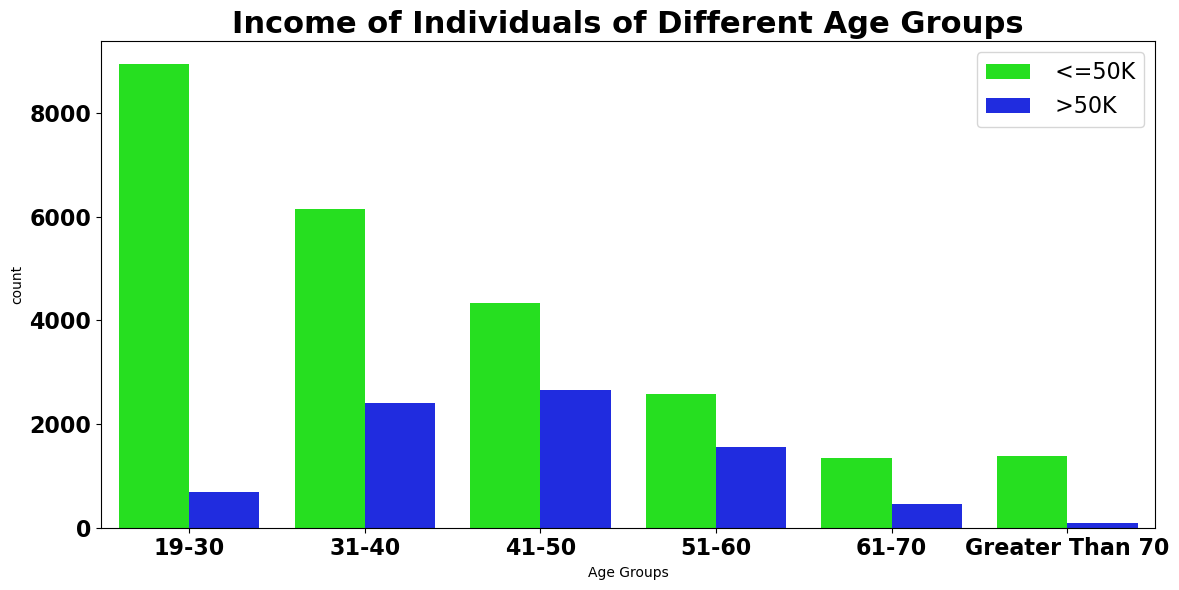

In [38]:
plt.figure(figsize=(12,6))
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
p = sns.countplot(ds['age_group'], hue=ds['Income'], palette='hsv', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=22, fontweight='bold')
p.set_xlabel('Age Groups')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

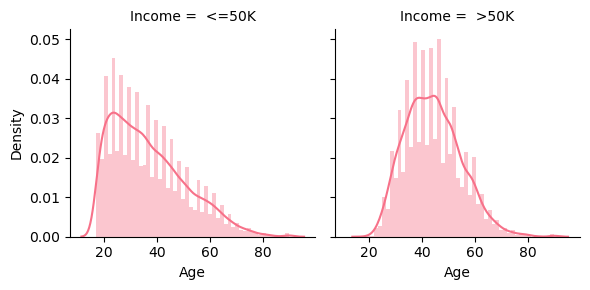

In [40]:
ax= sns.FacetGrid(ds,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

# Observation: 

Here's a noteworthy remark. Only 24% of people make more than 50,000 each year, and this plot reveals to which age group they belong.

Nearly 10% of those between the ages of 19 and 30 have annual incomes of more than 50,000, although this percentage falls even more for those over the age of 70. Perhaps a few fortunate elderly folks have better retirement plans than the majority of elderly people.

Most persons who make more than 50,000 per year are between the ages of 41 and 60. Finding out which occupation contributed to this revenue falling into this category will be fascinating.


# Education Vs Income

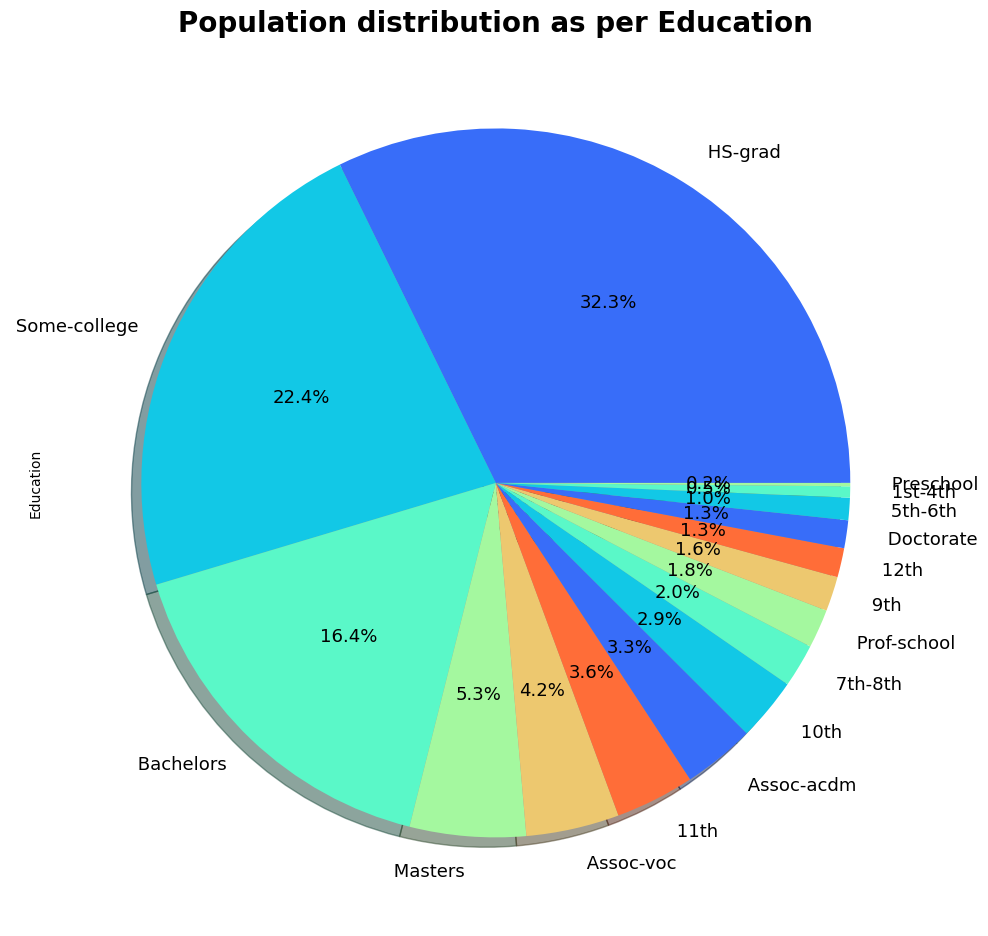

In [42]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
ds['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Education', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

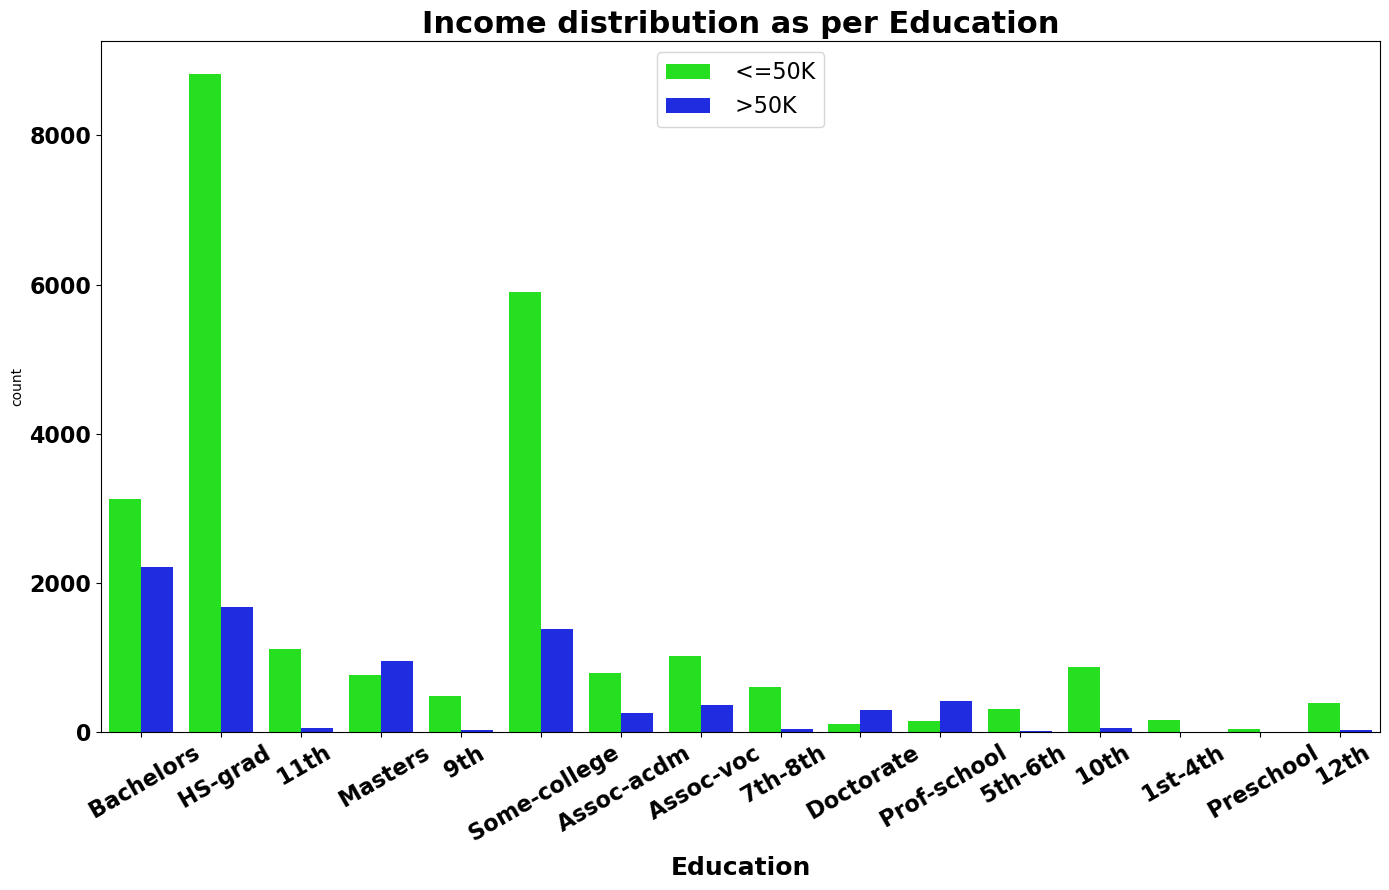

In [43]:
plt.figure(figsize=(14,9))
p = sns.countplot(ds['Education'], hue=ds['Income'], palette='hsv')
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

# Observation: 

32.3% of the population, or individuals, have completed high school or a related degree.

5.3% of the population holds a master's degree, while 1.3% of persons have a doctorate. This group includes intelligent and highly educated individuals.

Very few persons with schooling below the 12th grade earn more than $50,000 annually.

The majority of those with incomes over $50,000 are bachelor's degree holders.

Here's an intriguing finding on the income of highly educated people. persons with master's degrees, doctoral degrees, and prof-school degrees tend to earn more than those with lower education levels, with more persons earning more than $50,000 annually.


# Workclass vs Income

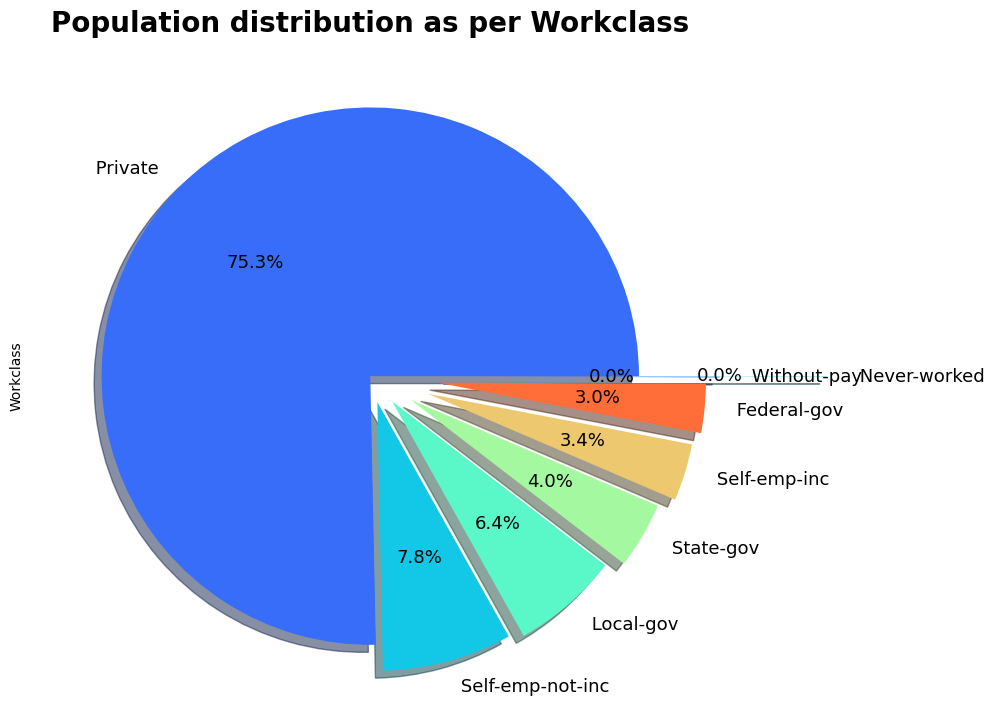

In [44]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
ds['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Workclass', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

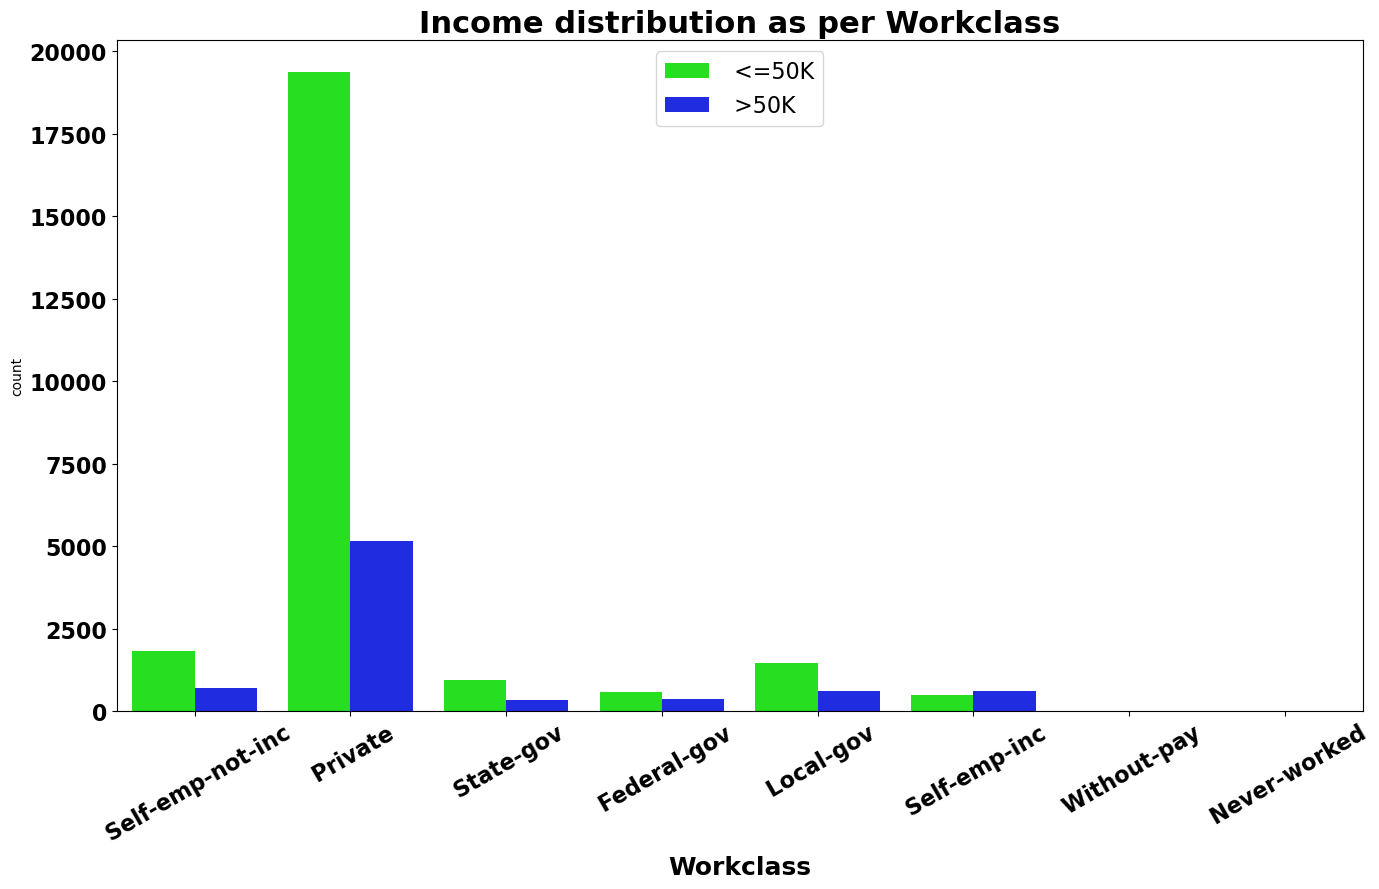

In [45]:
plt.figure(figsize=(14,9))
p = sns.countplot(ds['Workclass'], hue=ds['Income'], palette='hsv')
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

In [46]:
pd.crosstab(ds['Income'],ds["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


# Observation:

7.8% of individuals work for themselves, whereas 75.3% of people are employed by corporations.

Interesting finding in the Self-Employed Incorporated category shows that more persons than those earning less than $50,000 work for themselves!

Less than 25% of employees in the private sector make more than $50,000 a year, which is a considerable gap in income.

Another fairly unexpected finding comes from a Federal Government countplot, which shows a very slight variation in the number of persons whose annual income is greater than or less than $50,000. With certain differences, the state government is similar.

In [47]:
pd.crosstab(ds['Education'],ds["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


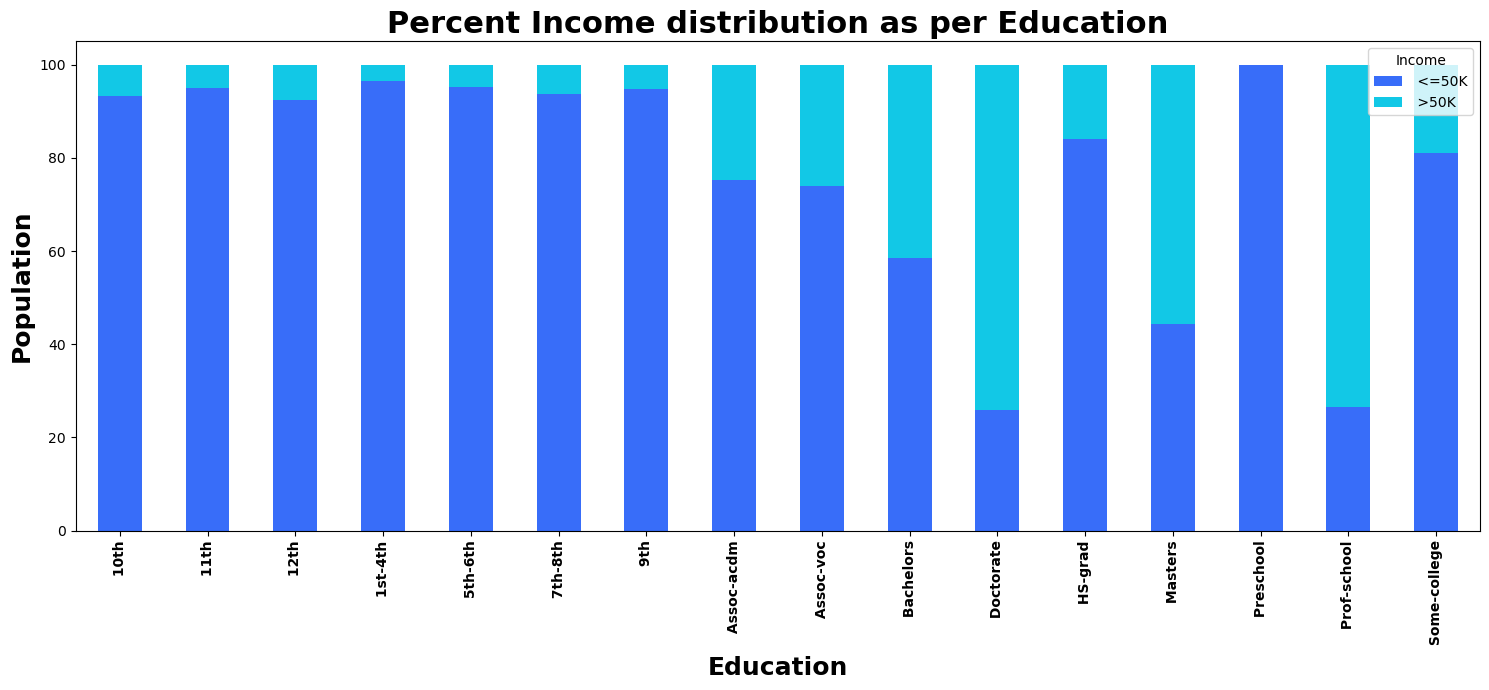

In [48]:
sns.set_palette('rainbow')
table = pd.crosstab(ds['Education'], ds['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

# Observations

In terms of proportion, prof- school comes in second with 75% of doctorate holders making more over $50,000 annually.

Therefore, highly compensated individuals frequently have a master's or doctoral degree.

Crosstab shows that the private sector, with 8305 employees, is the largest recruiter for the HS-Grade.

In addition to the local government, the private sector is a major employer of highly educated individuals with master's and doctoral degrees.

# Martial Status Vs Income

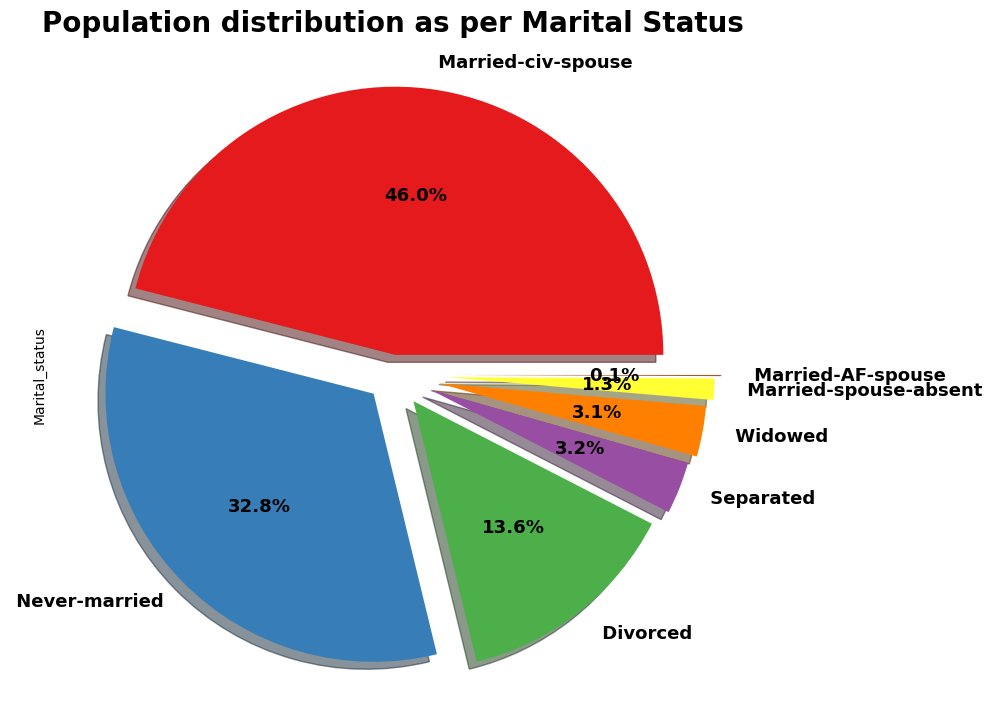

In [49]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize=(10,10))
ds['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%', explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225],
                                             textprops ={'fontsize':13,'fontweight':'bold'},shadow=True)
plt.title('Population distribution as per Marital Status', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

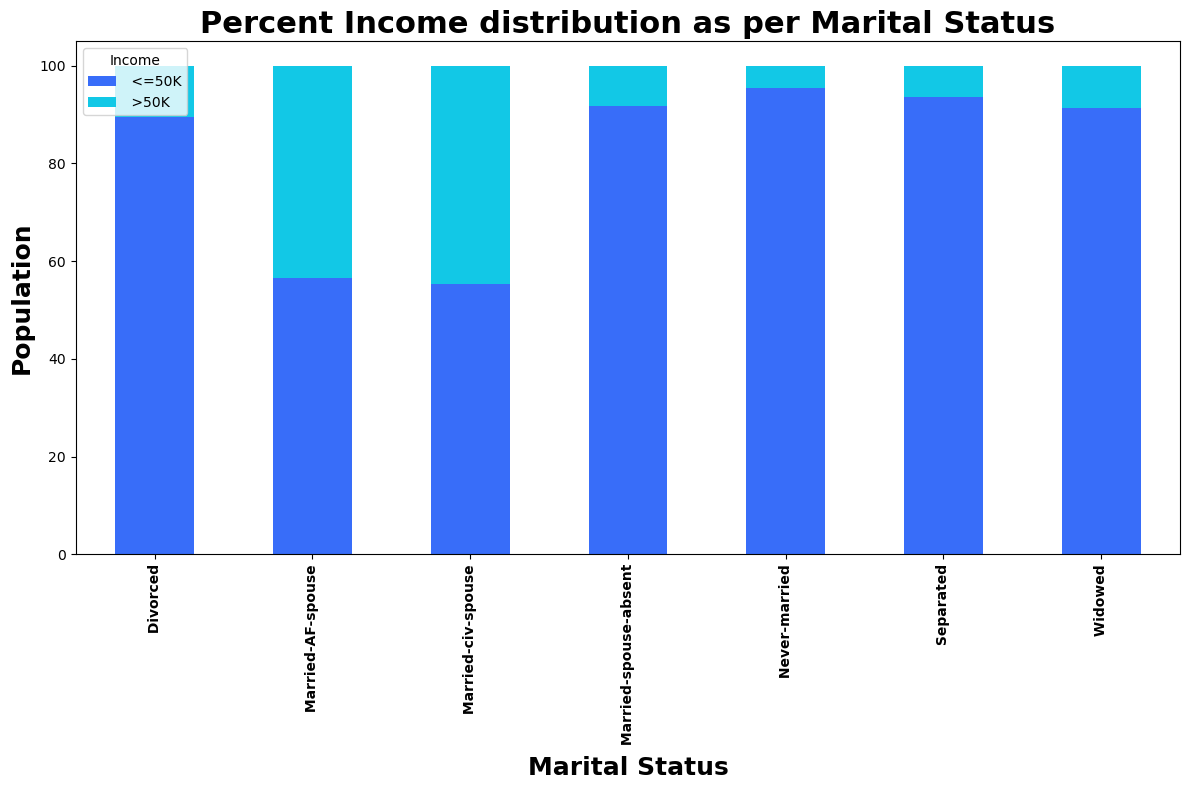

In [50]:
sns.set_palette('rainbow')
table = pd.crosstab(ds['Marital_status'], ds['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Marital Status', fontsize=22, fontweight='bold')
plt.xlabel('Marital Status', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [51]:
pd.crosstab(ds['Marital_status'],ds["Income"], margins=True).style.background_gradient(cmap='summer_r')

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


# Observation:

The majority of married persons who make over $50,000 a year do so.

Reason Possibly more stability and emotional support than those who are divorced or separated.

The only group with a comparable number of members in both categories is Married-civ-spouse, it should be noted.
Less than 25% of people in these groups make more than $50,000 annually.

# Occupation vs Income

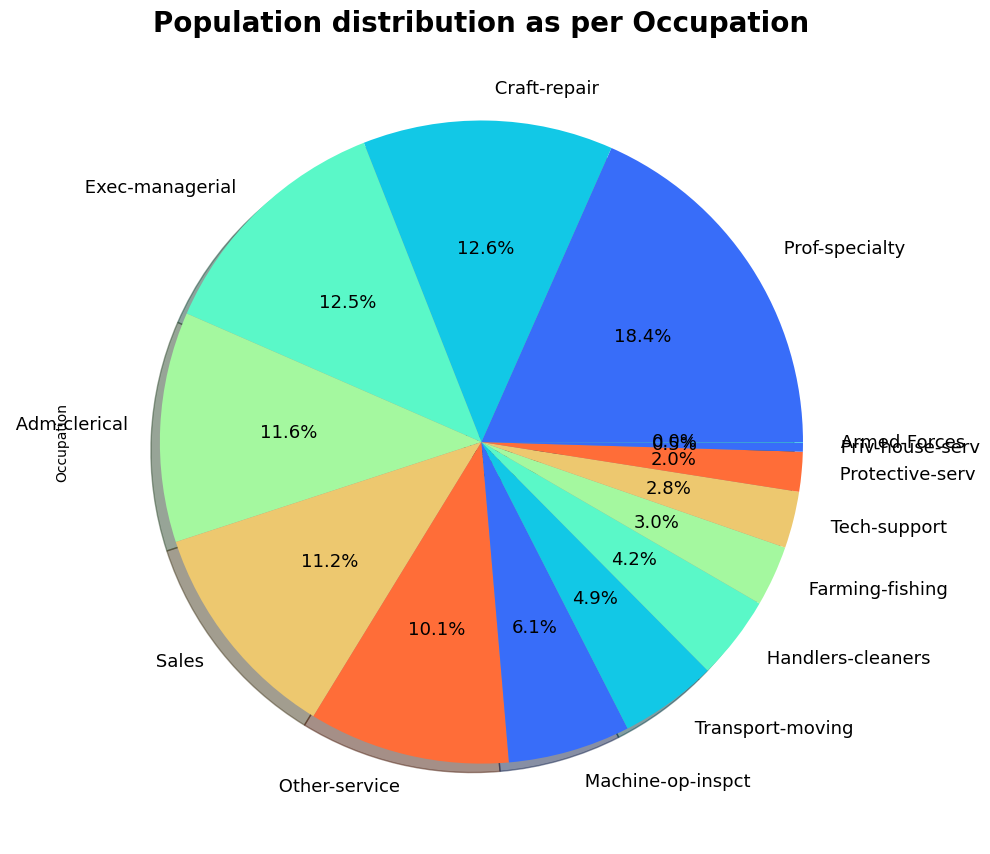

In [53]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
ds['Occupation'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Occupation', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

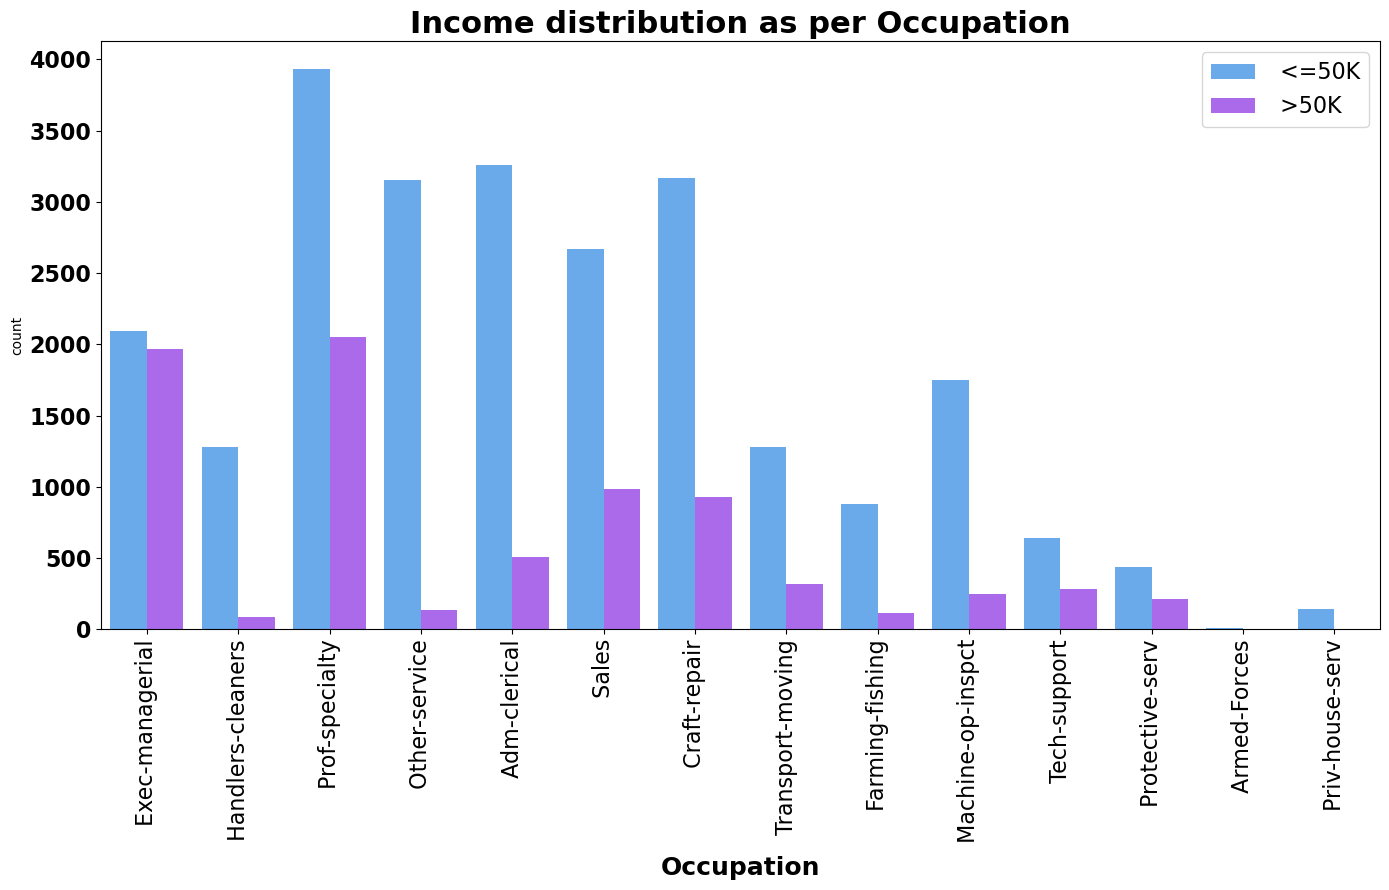

In [54]:
plt.figure(figsize=(14,9))
p = sns.countplot(ds['Occupation'], hue=ds['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Occupation',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()


# Observation: 

Executive and management positions have an equal likelihood of making more than $50,000 annually.

The likelihood of someone working in the armed forces, agriculture, fishing, machine operation, other services, administration, or cleaning is relatively low.

About 25% of sales professionals make more than $50,000 annually.

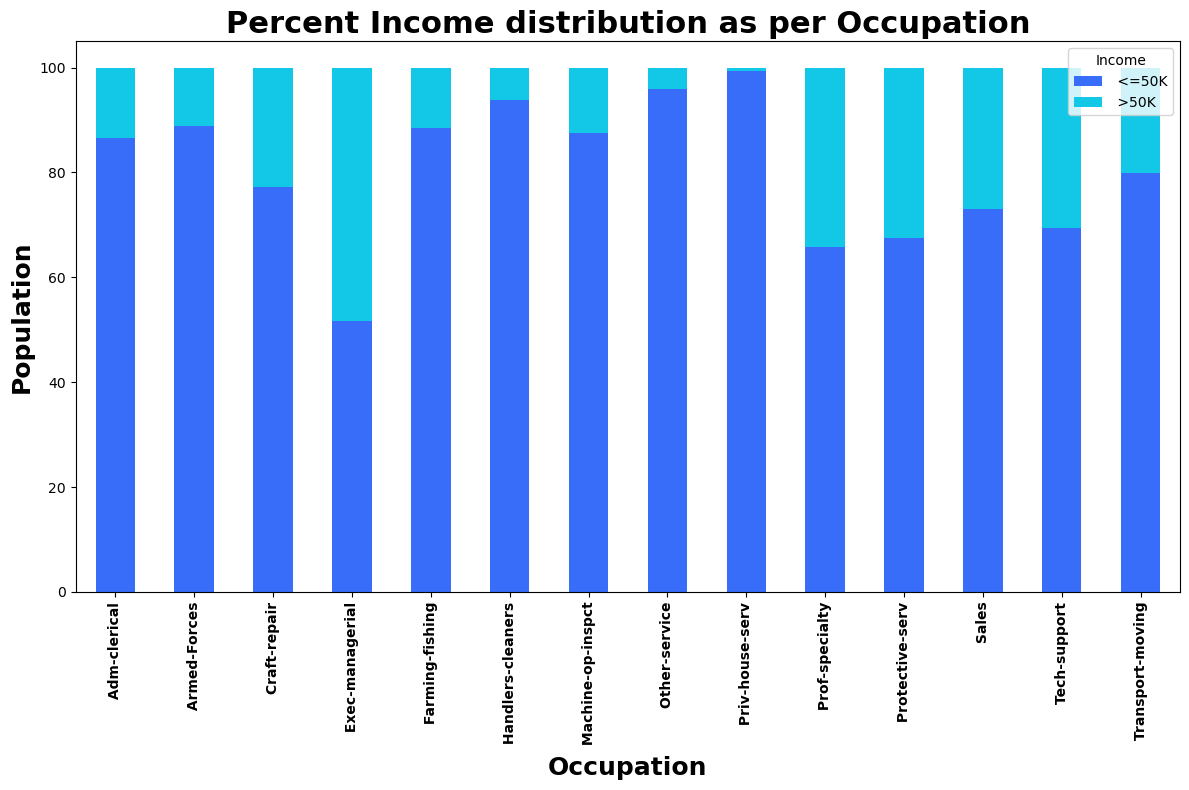

In [55]:
sns.set_palette('rainbow')
table = pd.crosstab(ds['Occupation'], ds['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.xlabel('Occupation', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [57]:
pd.crosstab(ds['Occupation'],ds["Income"], margins=True).style.background_gradient(cmap='summer_r')

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


# Observation

With a maximum of 2049 employees, the Prof-Speciality job leads the table for salaries of more than $50,000 per year, followed by the Exec-Managerial post with 1968 employees.

If we talk about percentage probability, an executive manager job has a 50% chance of being the leader of the club with incomes greater than $50,000.

An adult in a prof-specialty has a about 33% chance of making more over $50,000 each year.

There is a 1/147 possibility of working in private housekeeping and earning more than $50,000 annually to qualify for the Greater Than 50K Club.

In [61]:
pd.crosstab(ds['Occupation'],ds["Workclass"], margins=True).style.background_gradient(cmap='spring_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,,
Adm-clerical,317,283,0,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3191,106,530,56,1,4094
Exec-managerial,180,214,0,2690,400,392,189,0,4065
Farming-fishing,8,29,0,453,51,430,15,6,992
Handlers-cleaners,23,47,0,1272,2,15,9,1,1369
Machine-op-inspct,14,12,0,1911,13,36,13,1,2000
Other-service,35,193,0,2736,27,175,124,1,3291
Priv-house-serv,0,0,0,147,0,0,0,0,147


Observation:

Another unexpected fact is that seven persons from the category of never having worked had high incomes in the profession of professor-speciality. Similar to the Unpaid Workclass, there are 6 Executive Managers. They can be working on a profile for an unpaid internship.

# Relationship vs Income

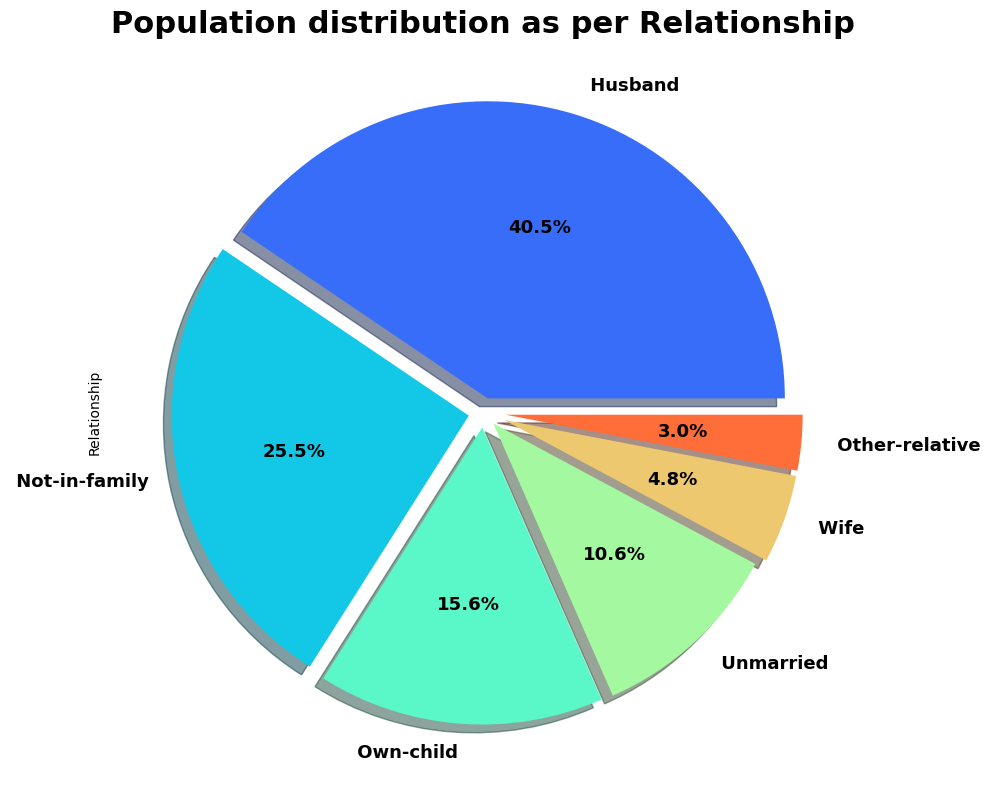

In [63]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
ds['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

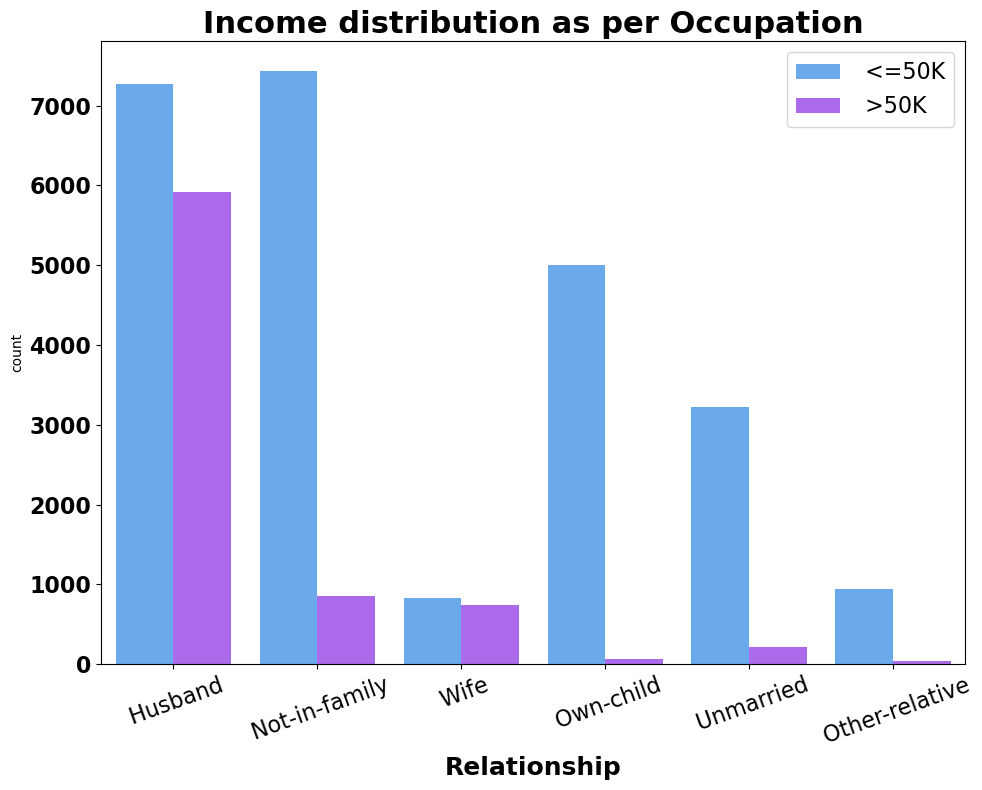

In [65]:
plt.figure(figsize=(10,8))
p = sns.countplot(ds['Relationship'], hue=ds['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Relationship',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

# Observation

Equal odds exist for wives to make more than $50,000 annually.

Although considerable, there is less of a chance for husbands to earn more than $50,000 annually.

Only a small number of single persons make more than $50,000 a year.

# Race vs Income

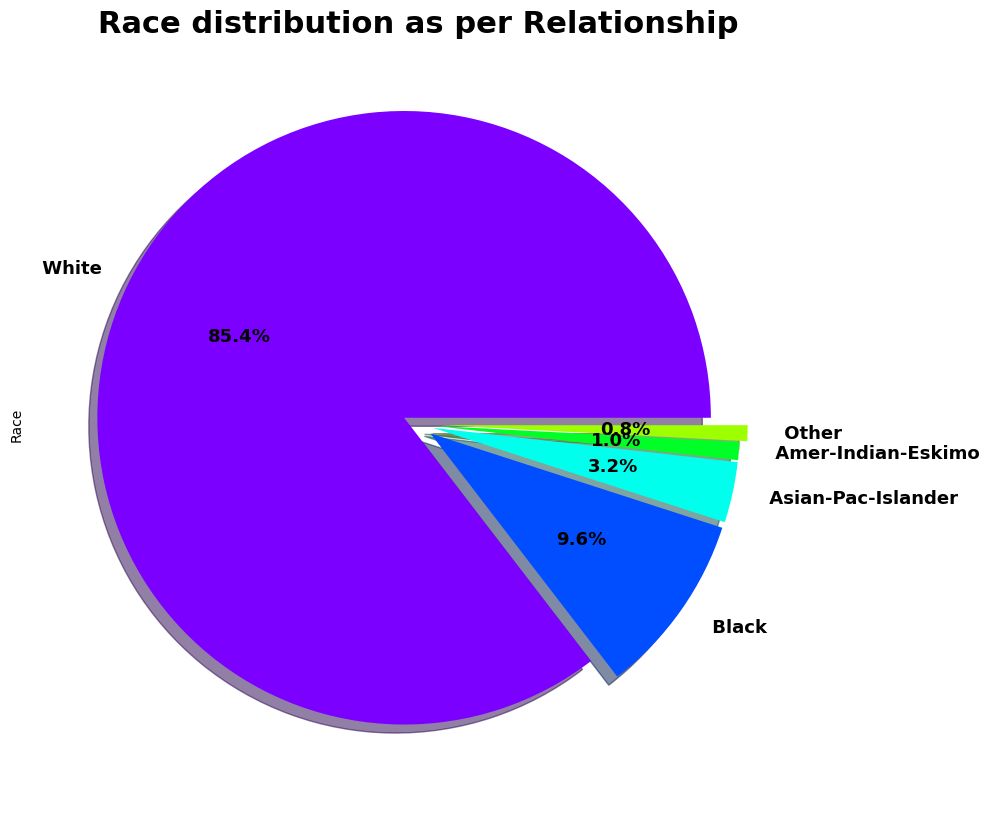

In [67]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(10,10))
ds['Race'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Race distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

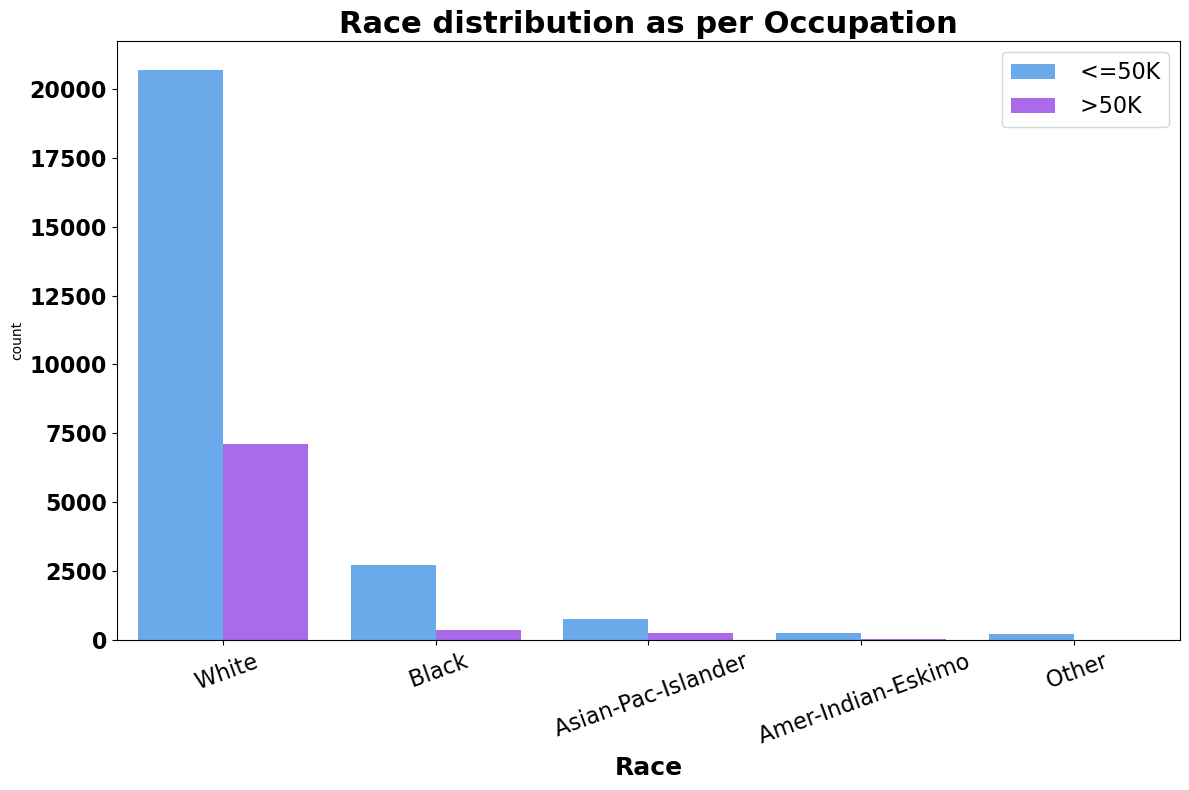

In [68]:
plt.figure(figsize=(12,8))
p = sns.countplot(ds['Race'], hue=ds['Income'], palette='cool')
plt.title('Race distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Race',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

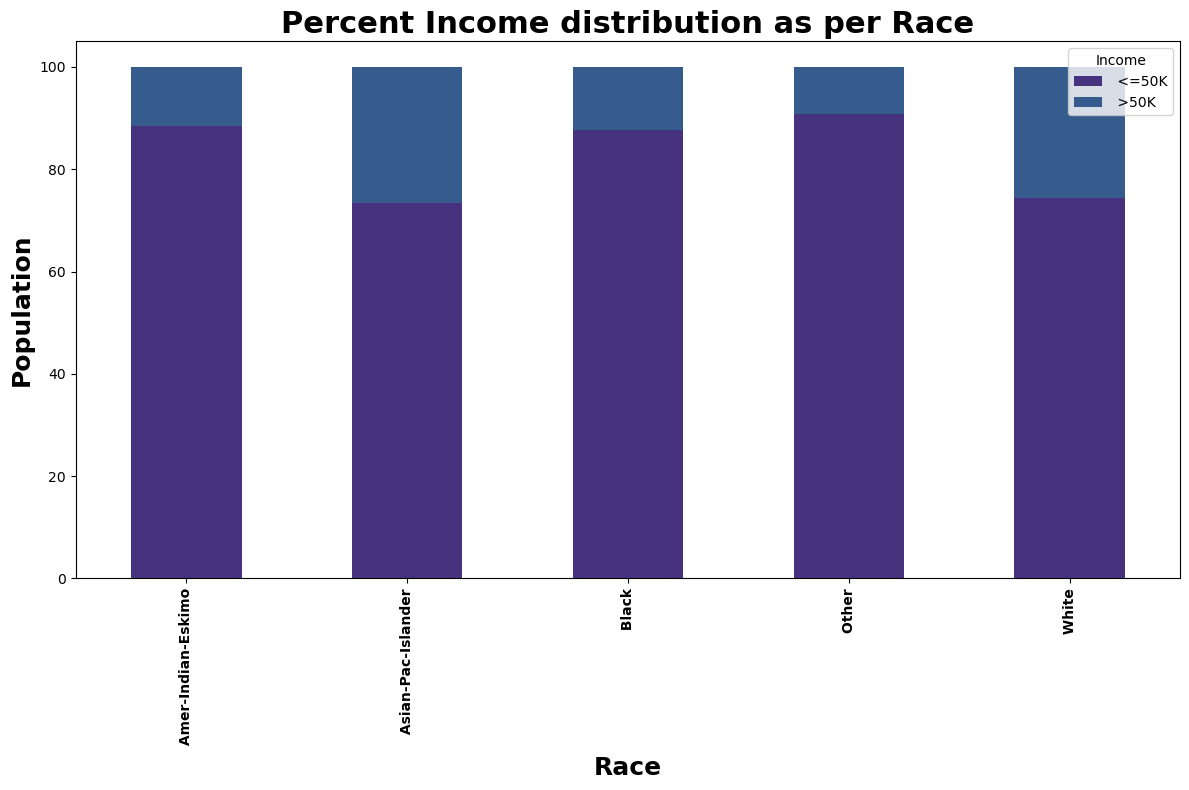

In [69]:
sns.set_palette('viridis')
table = pd.crosstab(ds['Race'], ds['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Race', fontsize=22, fontweight='bold')
plt.xlabel('Race', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

# Observations:

White people make up 85.4% of the population, while black people make up 9.6%.

White folks make up the majority of the Greater than 50K Club.

# Sex Vs Income

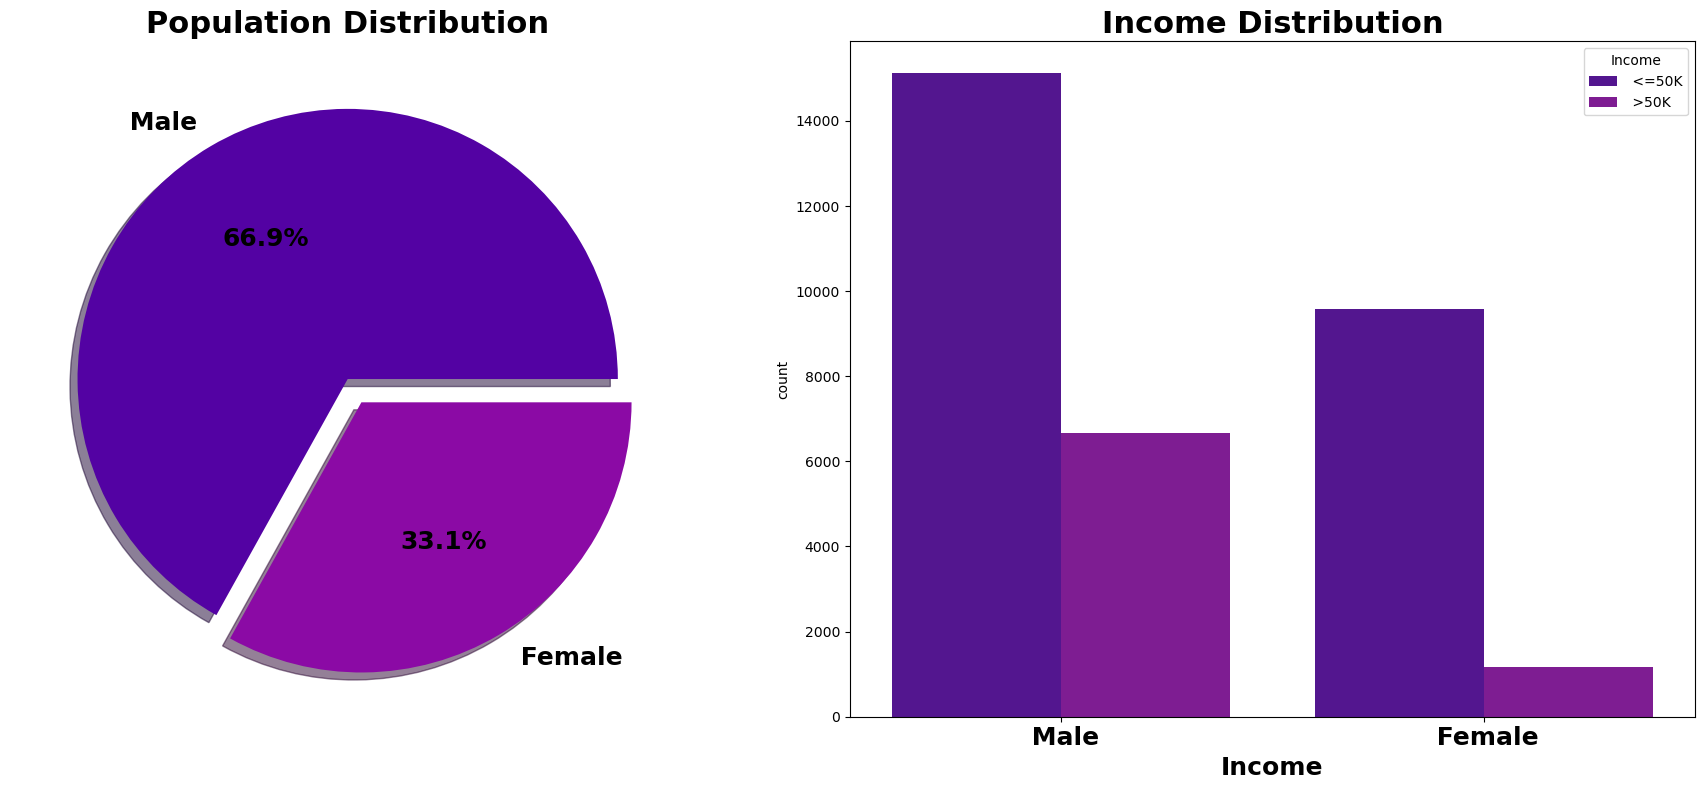

In [72]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(18,8))
ds['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Sex',hue=ds['Income'] ,data=ds,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

# Observation:
    
Significant pay disparity between men and women.

Less than 10% of women belong to the $50K+ club.

Approximately 33% of men had annual incomes of over $50,000.

In [73]:
pd.crosstab(ds['Occupation'],[ds.Sex,ds.Income], margins=True).style.background_gradient(cmap='summer_r')

# Observation

33% of the population is made up of women. The majority of women employed there are in administrative, other services, and professional specialties.

Similar to how men are Maximum Number in More Than $50,000 Club in ladies derives from academic and executive management careers.

In prof-specialty, males predominate.


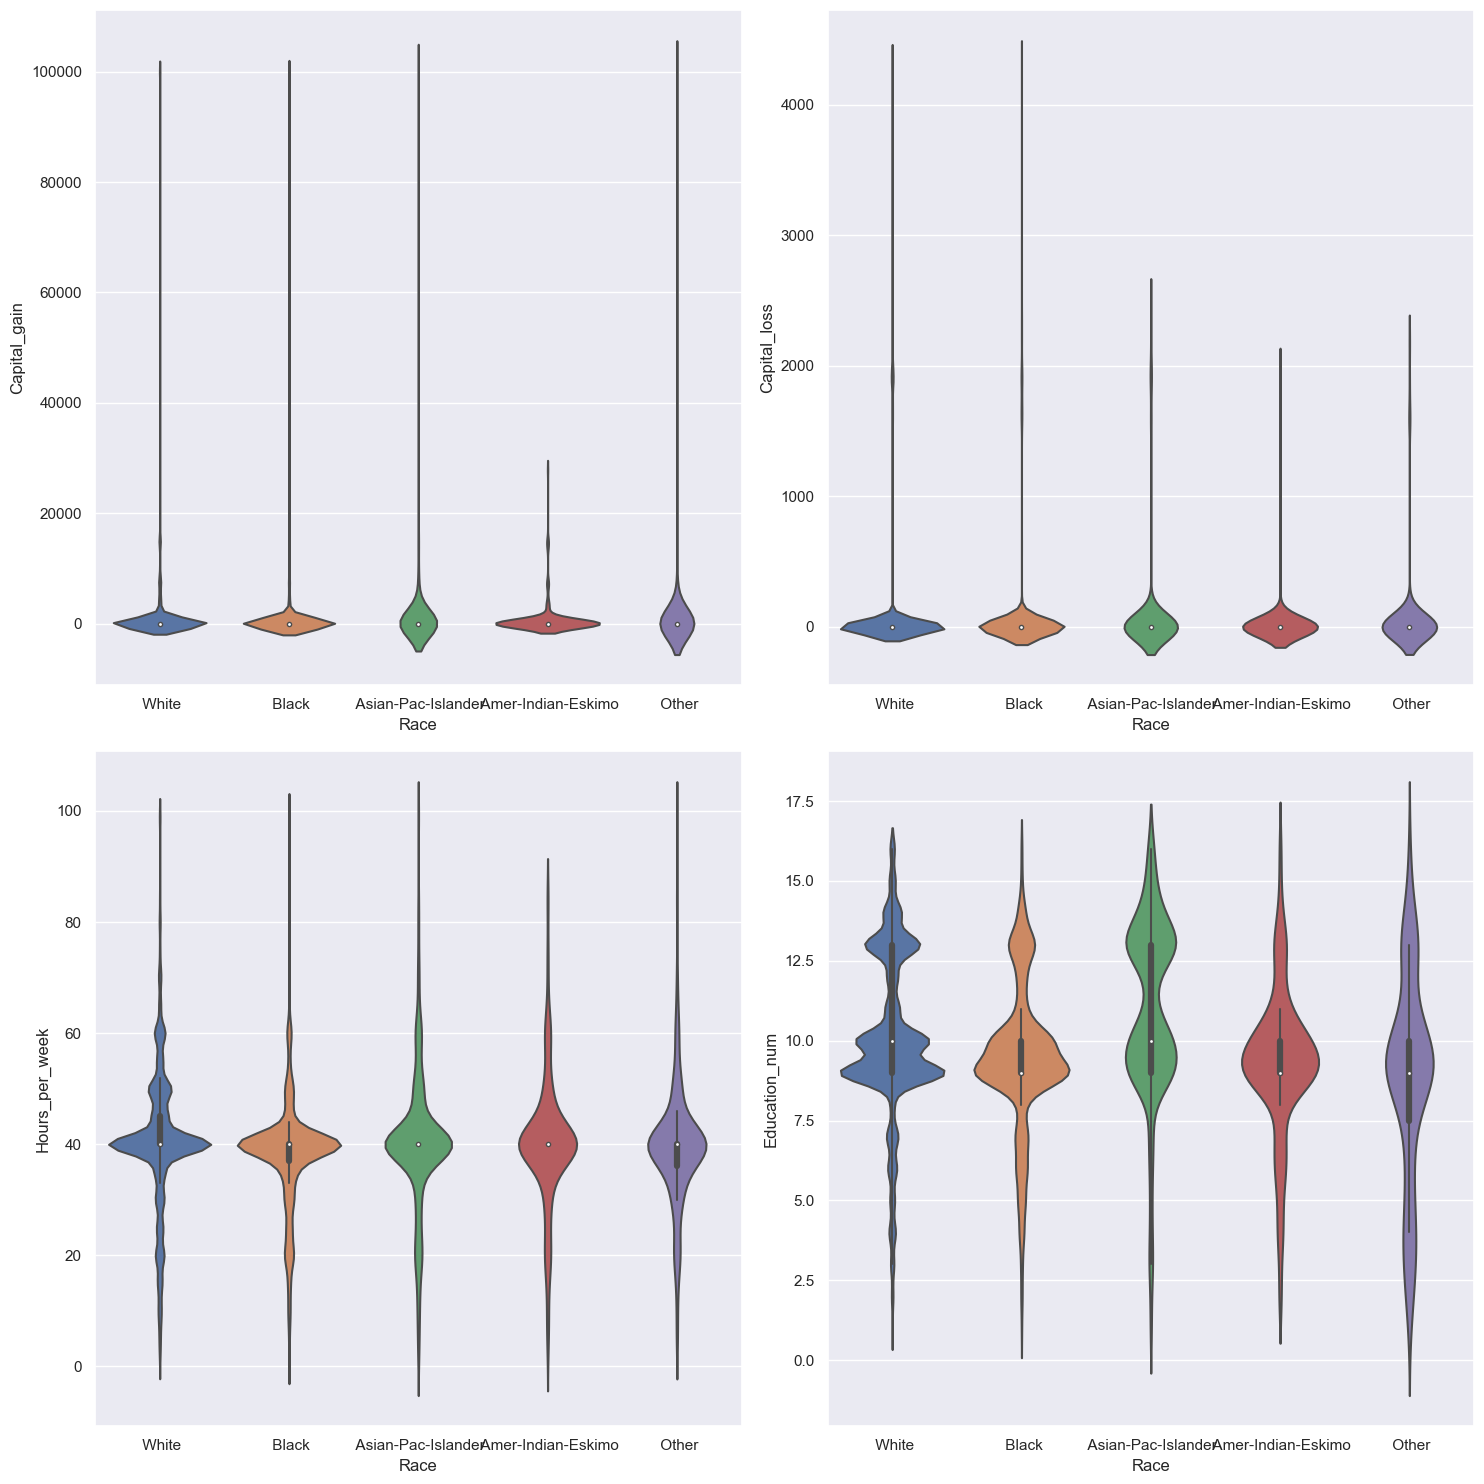

In [74]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = ds['Race'], y = ds['Capital_gain'], data = ds);
plt.subplot(2,2,2)
sns.violinplot(x = ds['Race'], y = ds['Capital_loss'], data = ds);
plt.subplot(2,2,3)
sns.violinplot(x = ds['Race'], y = ds['Hours_per_week'], data = ds);
plt.subplot(2,2,4)
sns.violinplot(x = ds['Race'], y = ds['Education_num'], data = ds);

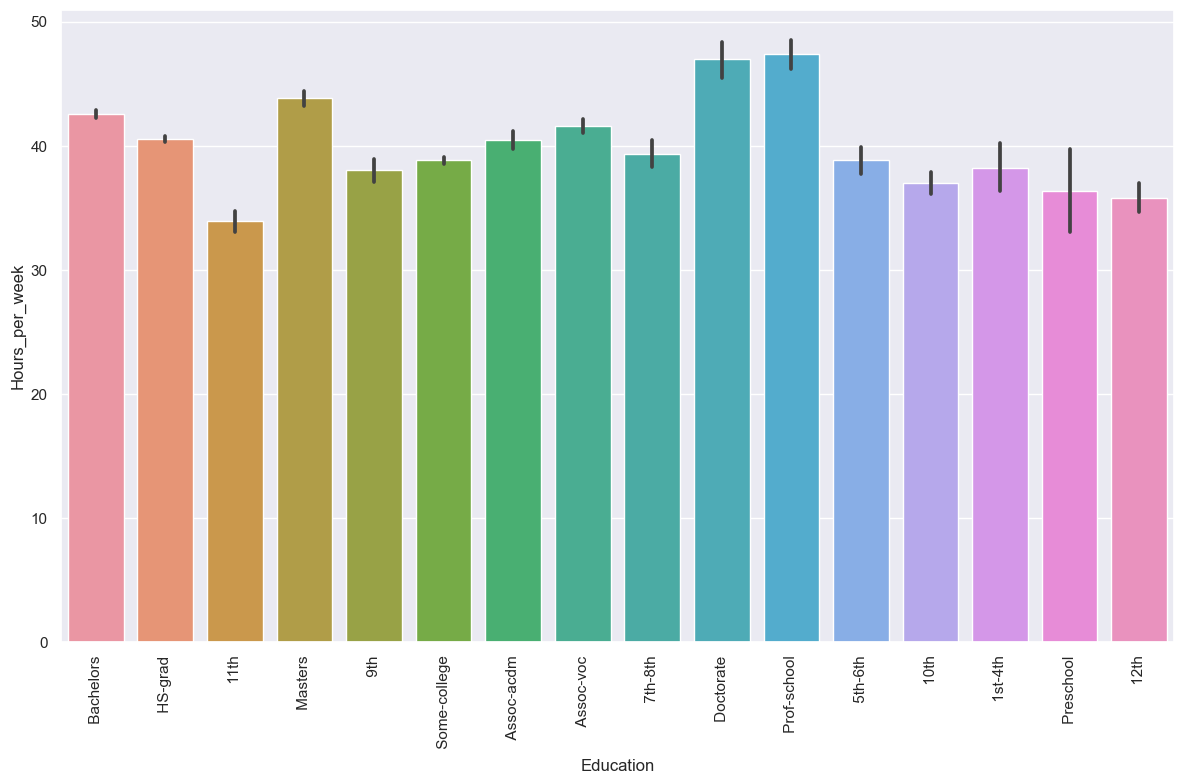

In [75]:
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = ds['Education'], y = ds['Hours_per_week'], data = ds)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

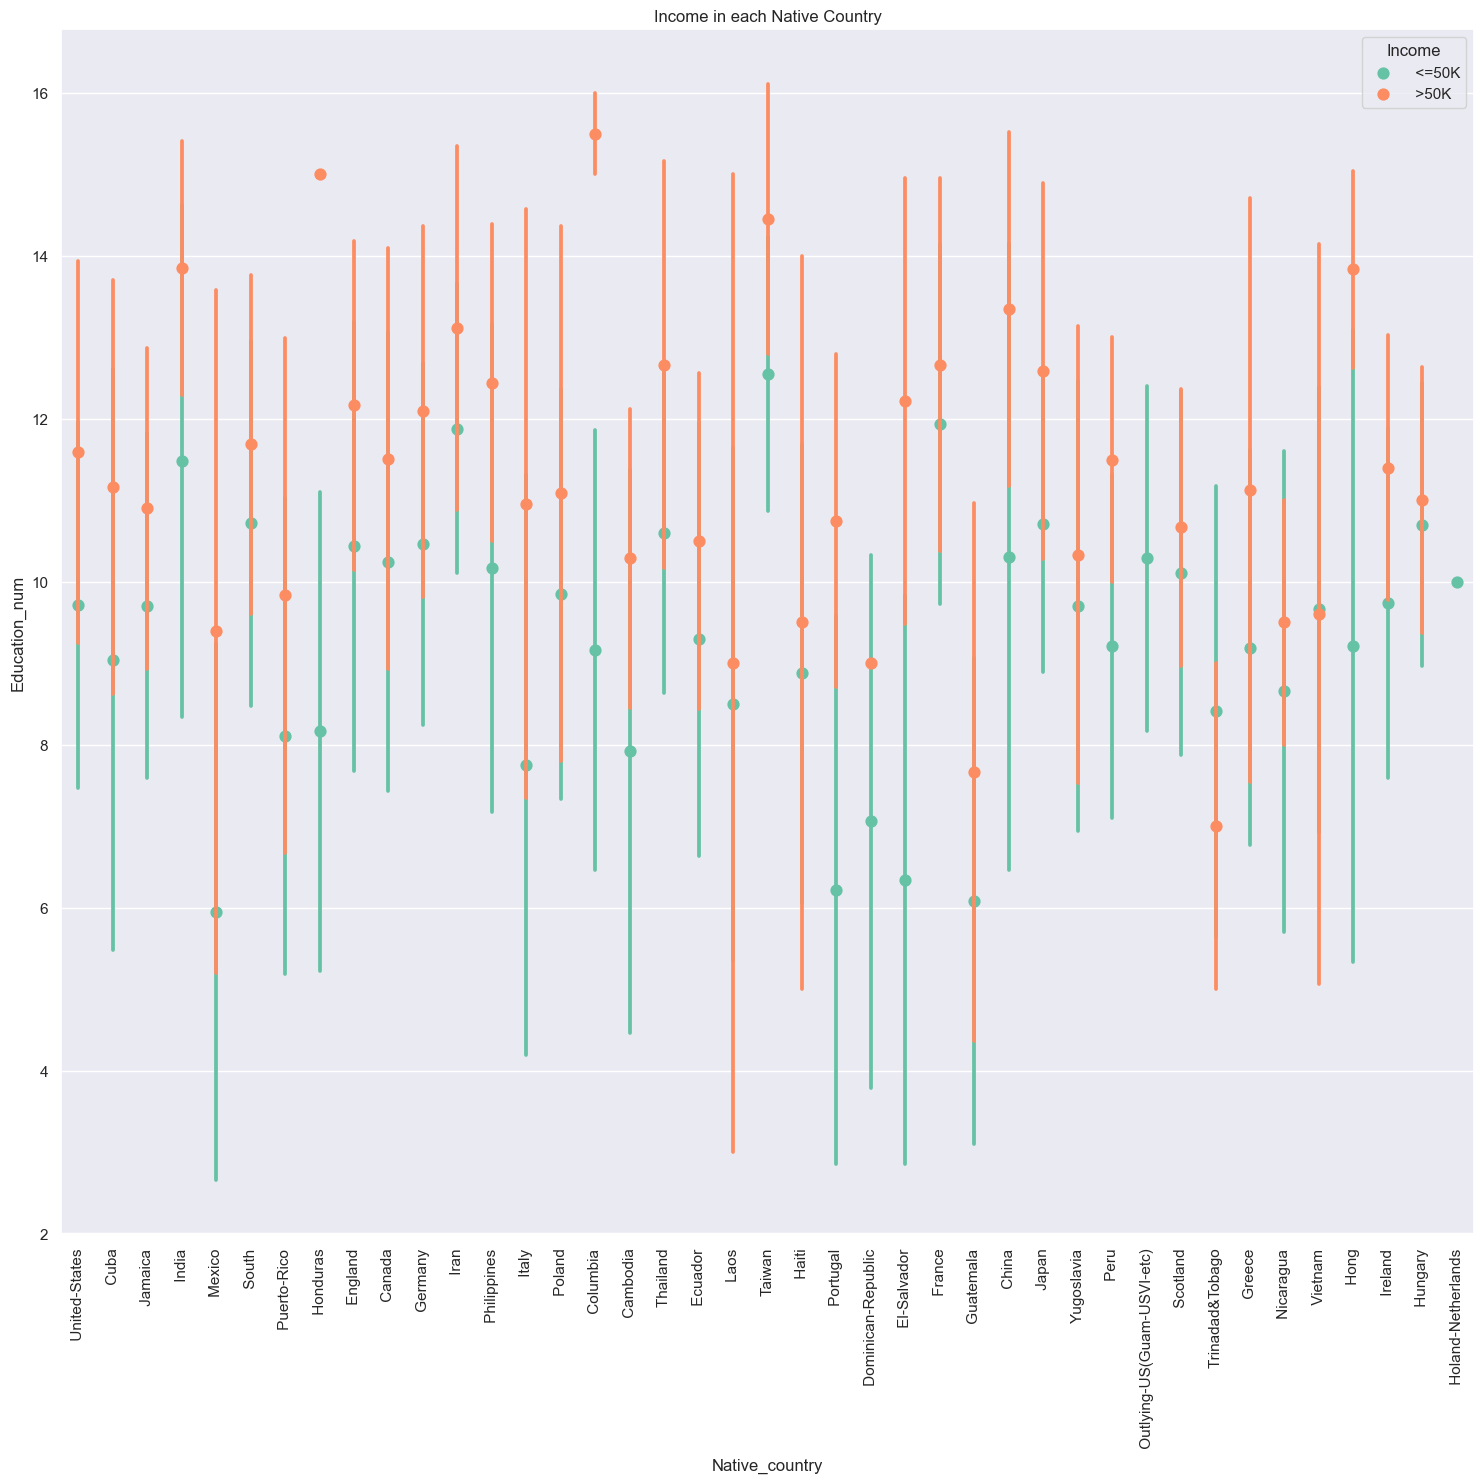

In [77]:
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=ds, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

In [82]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    ds[i] = le.fit_transform(ds[i])
ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


# Outlier Treatment

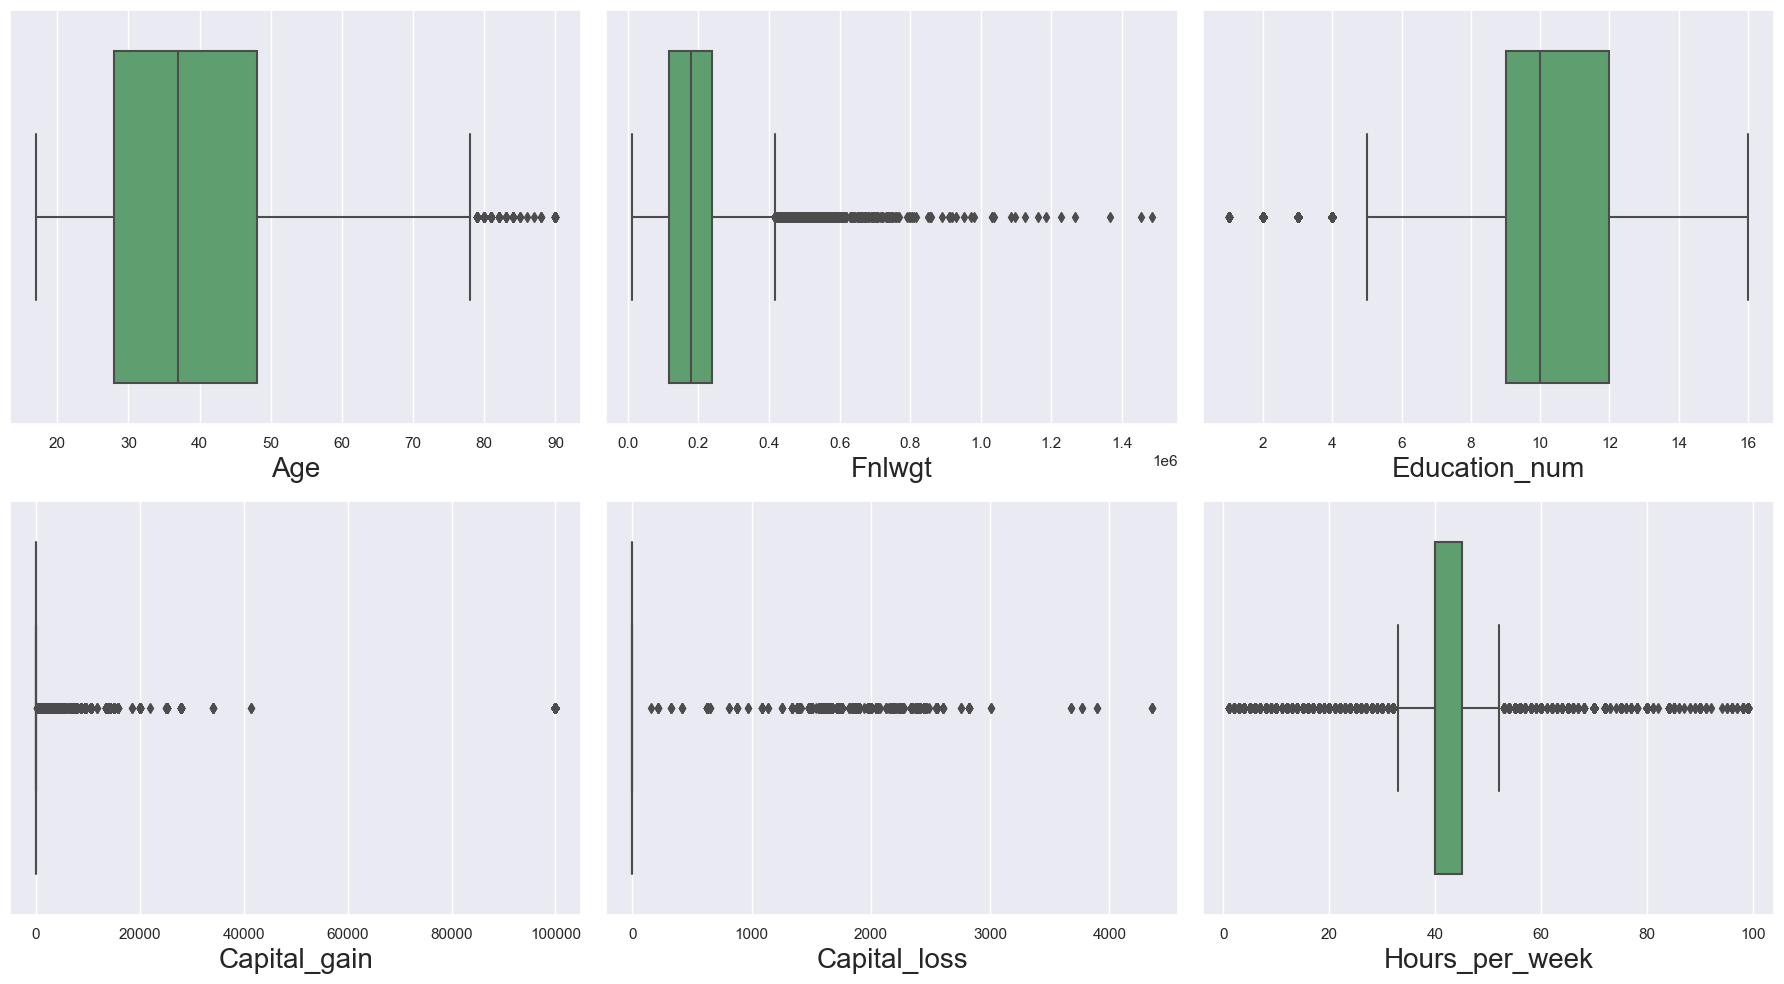

In [83]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(ds[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above plot we can observe that outliers are present in the dataset

In [85]:
#Now drop the unnecessary data
ds.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

In [86]:
ds.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,14,2,3,5,4,0,0,0,40,38,0,31-40


In [87]:
ds.columns

Index(['Age', 'Workclass', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Income', 'age_group'],
      dtype='object')

In [94]:
#Utilising Z-score method to remove the outliers
from scipy.stats import zscore
import numpy as np

# Filter only the numeric columns from 'ds'
numeric_columns = ds.select_dtypes(include=np.number).columns

# Compute the z-scores for numeric columns in 'ds'
z_scores = zscore(ds[numeric_columns])

# Set the threshold for outlier detection
threshold = 3

# Filter out the rows with outliers
ds_no_outliers = ds[(np.abs(z_scores) < threshold).all(axis=1)]

# Print the shape of the dataset before and after removing outliers
print("Shape of the dataset before removing outliers:", ds.shape)
print("Shape of the dataset after removing outliers:", ds_no_outliers.shape)

# Assign the outlier-free dataset back to 'ds'
ds = ds_no_outliers.copy()


Shape of the dataset before removing outliers: (32536, 14)
Shape of the dataset after removing outliers: (28061, 14)


Percentage loss is around 15% but it is manageble because our dataset still contain 28061 rows, which is suffiecient for model building

# Checking the Skewness of the features

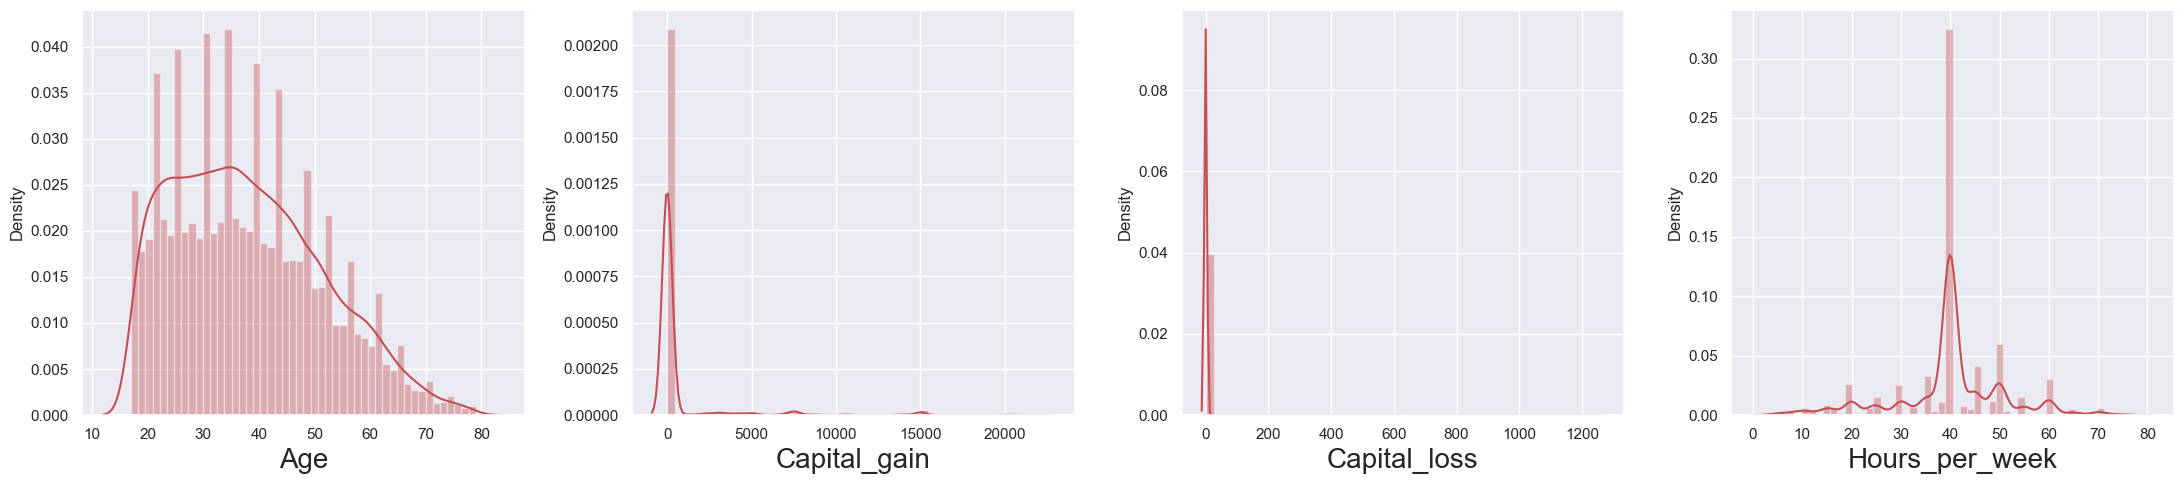

In [96]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in ds[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(ds[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [97]:
ds.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

# Observations: 

Relationship, sex, native country, and income are all skewed, but as they fall under different categories, the idea of skewness has no bearing on them.

The numeric variables capital_gain and capital_loss include a lot of zeros and high numbers. So they have skewness. Transforming it is pointless since the resulting distorted data will be useless.

In [99]:
#Checking Correlation
ds.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.029674,0.045622,-0.286328,-0.001610,-0.270591,0.021292,0.089469,0.131998,0.023459,0.090783,0.037494,0.241844
Workclass,0.029674,1.000000,-0.002200,-0.015623,0.008779,-0.057823,0.067532,0.069617,0.011083,-0.010613,0.028104,0.001938,-0.007699
Education_num,0.045622,-0.002200,1.000000,-0.058587,0.073142,-0.092447,0.080766,0.003688,0.157858,0.007348,0.156303,0.149688,0.320271
Marital_status,-0.286328,-0.015623,-0.058587,1.000000,0.036477,0.183248,-0.084558,-0.125361,-0.069601,-0.016396,-0.196053,-0.032575,-0.194146
Occupation,-0.001610,0.008779,0.073142,0.036477,1.000000,-0.038735,0.000613,0.051055,0.009446,-0.004779,-0.022194,0.018069,0.030664
Relationship,-0.270591,-0.057823,-0.092447,0.183248,-0.038735,1.000000,-0.146432,-0.577195,-0.089095,0.030105,-0.261919,-0.011274,-0.248263
Race,0.021292,0.067532,0.080766,-0.084558,0.000613,-0.146432,1.000000,0.122731,0.031333,0.000186,0.055486,0.018660,0.094756
Sex,0.089469,0.069617,0.003688,-0.125361,0.051055,-0.577195,0.122731,1.000000,0.069539,-0.027323,0.236168,-0.011189,0.211792
Capital_gain,0.131998,0.011083,0.157858,-0.069601,0.009446,-0.089095,0.031333,0.069539,1.000000,-0.009077,0.098705,0.019185,0.343487
Capital_loss,0.023459,-0.010613,0.007348,-0.016396,-0.004779,0.030105,0.000186,-0.027323,-0.009077,1.000000,-0.003440,0.002925,-0.016465


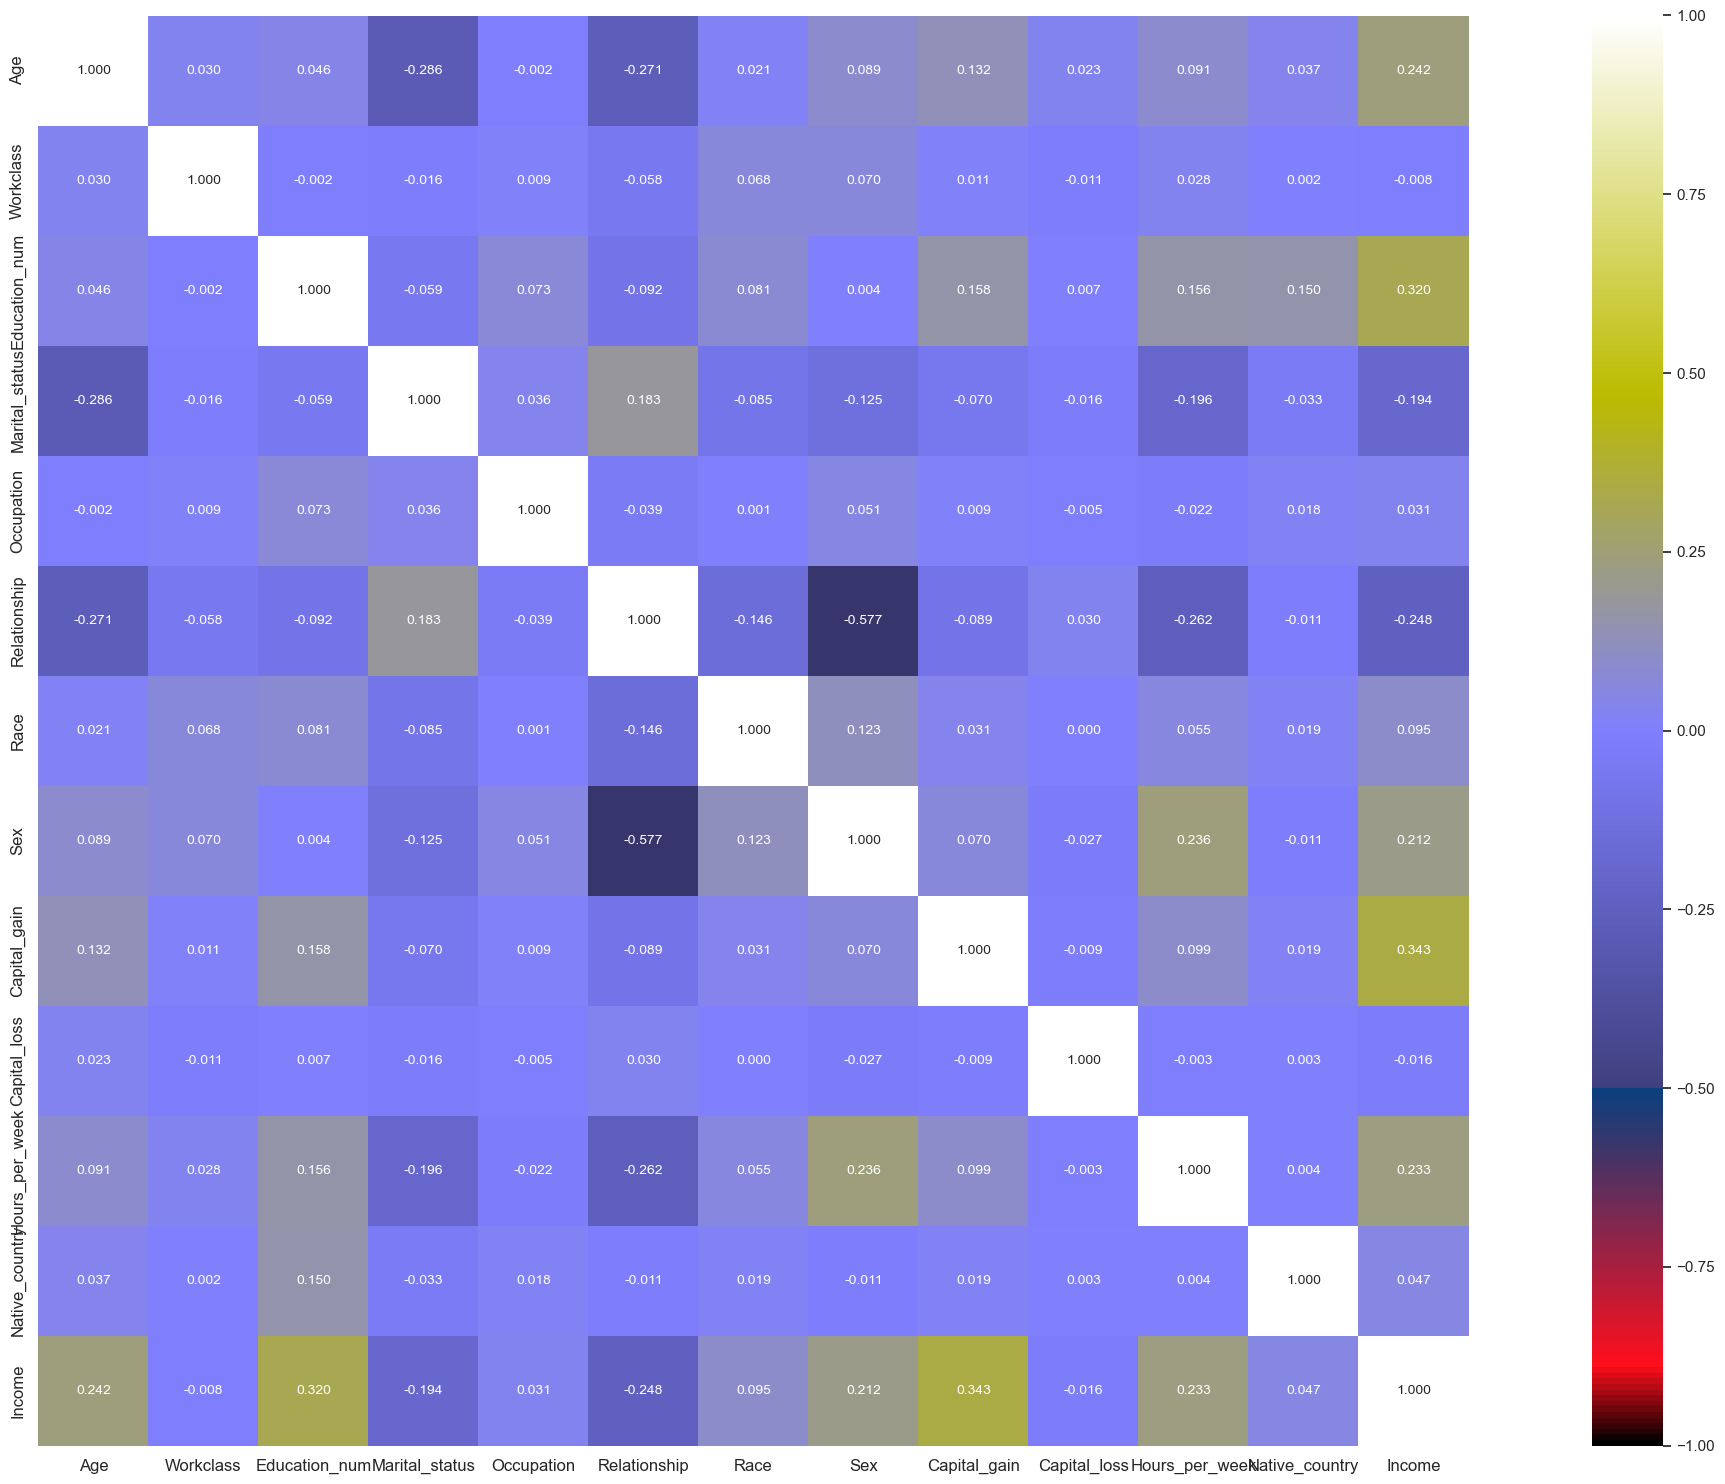

In [102]:

plt.figure(figsize=(25, 15))

#Create a correlation heatmap using seaborn's heatmap function
sns.heatmap(ds.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='.3f',
annot_kws={'size': 10}, cmap='gist_stern')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

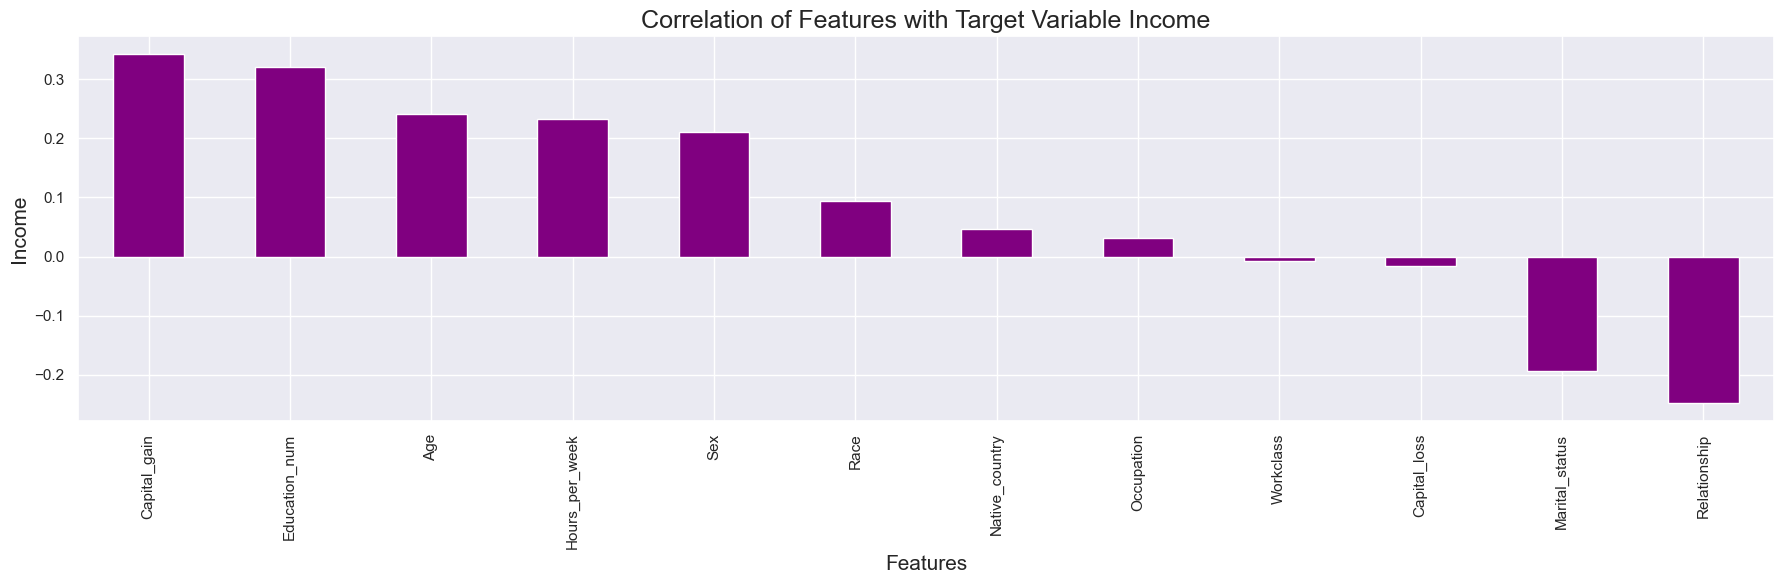

In [103]:
plt.figure(figsize=(18, 6))

#Compute the correlation of features with the target variable 'Income' and plot as a bar chart
ds.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar', color='purple')

plt.xlabel('Features', fontsize=15)
plt.ylabel('Income', fontsize=15)
plt.title('Correlation of Features with Target Variable Income', fontsize=18)

plt.show()

# Observations: 

Less than 10% of a link exists between capital loss and workclass, occupation, home nation, and race. We will determine whether to exclude these weakly correlated characteristics or use PCA after examining multicollinearity.

High or low correlation does not imply causality, and vice versa.

Maximum correlation of -0.557 exists between the input characteristics for sex and relationship.

Capital gain and the intended variable have a strong correlation.

# Checking Multicollinearity between features using VIF

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Select only the numeric columns from the dataset
numeric_columns = ds.select_dtypes(include=np.number).columns

# Create an empty DataFrame for VIF calculation
vif = pd.DataFrame()
vif['Features'] = numeric_columns
vif['VIF'] = [variance_inflation_factor(ds[numeric_columns].values, i) for i in range(len(numeric_columns))]

vif



,Features,VIF
0,Age,10.452897
1,Workclass,8.807425
2,Education_num,21.287850
3,Marital_status,4.358505
4,Occupation,3.357557
5,Relationship,2.937270
6,Race,36.291318
7,Sex,4.566872
8,Capital_gain,1.209589
9,Capital_loss,1.004295


# Observations:
    
some of the strongly linked features are to be removed. However, this won't work in our situation because the majority of the input qualities have moderate or weak correlations with one another.

Scaled Data and PCA are two further strategies for dealing with Multicollinearity.

In [107]:
ds.Income.value_counts()

0    21767
1     6294
Name: Income, dtype: int64

# We must balance the target variable since the data it contains is unbalanced.

In [111]:
#Utlising SMOTE for balancing the Data
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Separate the target variable and independent features
X = ds.drop(['Income'], axis=1)
Y = ds['Income']

# Handle missing values in the dataset
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Perform one-hot encoding on categorical variables
categorical_cols = X.select_dtypes(include='object').columns
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))

# Combine the encoded features with the remaining numerical features
X_encoded.columns = encoder.get_feature_names(categorical_cols)
X_numeric = X.select_dtypes(exclude='object')
X = pd.concat([X_numeric, X_encoded], axis=1)

# Oversample the data using SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

# Display the value counts of the target variable
Y.value_counts()



0    21767
1    21767
Name: Income, dtype: int64

Now we have balanced the Target variable

# Standard Scaling

In [112]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

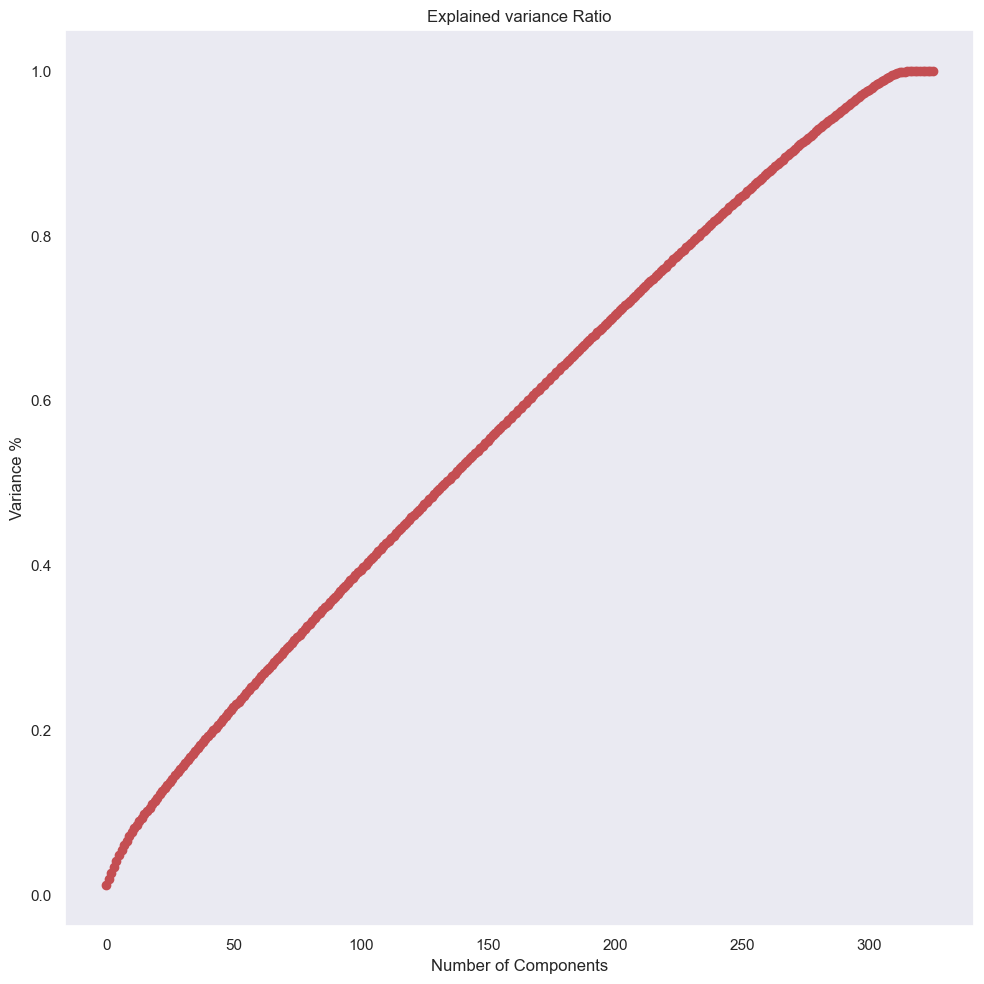

In [113]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [114]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [115]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# ML Model Building

In [116]:
#Importing important Libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (30473, 9)
Training target vector size: (30473,)
Test feature matrix size: (13061, 9)
Test target vector size: (13061,)


In [118]:
#Best Random State
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.823367276625067 on Random_state 30


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=30, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.823367276625067


Confusion matrix of Logistics Regression : 
 [[5096 1416]
 [ 891 5658]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.85      0.78      0.82      6512
           1       0.80      0.86      0.83      6549

    accuracy                           0.82     13061
   macro avg       0.83      0.82      0.82     13061
weighted avg       0.83      0.82      0.82     13061



In [121]:
#Finding the ideal n_neighbors number for the KNN
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3900414109731752
RMSE value for k=  2 is: 0.4244462968482585
RMSE value for k=  3 is: 0.39462742127626266
RMSE value for k=  4 is: 0.41143966391761105
RMSE value for k=  5 is: 0.3979120146026416
RMSE value for k=  6 is: 0.403832797025513
RMSE value for k=  7 is: 0.3994483601420617
RMSE value for k=  8 is: 0.4048742149468099
RMSE value for k=  9 is: 0.4011697160892292
RMSE value for k=  10 is: 0.40638424057023304
RMSE value for k=  11 is: 0.40326361732470445
RMSE value for k=  12 is: 0.4055355430050241


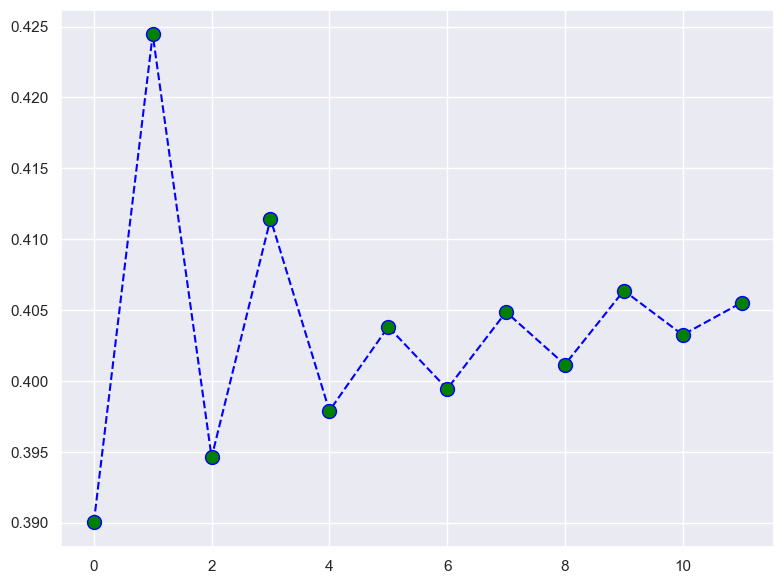

In [122]:
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

# Applying Other Classification algorithm

In [139]:
ds.columns

Index(['Age', 'Workclass', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Income', 'age_group'],
      dtype='object')

In [142]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Copy the dataset to a new dataframe to avoid modifying the original data
df_encoded = ds.copy()

# Separate features and target variable
X = df_encoded.drop('Income', axis=1)
Y = df_encoded['Income']

# Label encoding for non-numeric columns
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the models
models = [
    LogisticRegression(),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(),
    ExtraTreesClassifier()
]

# Train and evaluate models
for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix', model, 'is' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')
    print('\n')


Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8255834669517192


Confusion matrix : 
 [[4136  224]
 [ 755  498]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      4360
           1       0.69      0.40      0.50      1253

    accuracy                           0.83      5613
   macro avg       0.77      0.67      0.70      5613
weighted avg       0.81      0.83      0.81      5613





Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.811865312667023


Confusion matrix : 
 [[4353    7]
 [1049  204]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      4360
           1       0.97      0.16      0.28      1253

    accuracy                           0.81      5613
   macro avg       0.89      0.58      0.59      5613
weighted avg       0.84      0.81      

In [145]:
from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    scores = cross_val_score(model, X_encoded, Y, cv=5)
    print('\n')
    print('\033[1m' + 'Cross Validation Scores for', model.__class__.__name__ + ':\033[0m')
    print('Scores:', scores)
    print('Mean Score:', scores.mean())
    print('Standard Deviation:', scores.std())
    print('\n')




Cross Validation Scores for LogisticRegression:
Scores: [0.85996793 0.86404134 0.86617962 0.86920884 0.87063435]
Mean Score: 0.8660064159682257
Standard Deviation: 0.003795474742523145




KeyboardInterrupt: 

In [ ]:
#Do to hardware contraint it is not been able to execute. I am moc=ving forward

In [146]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }


In [147]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.857 total time=   2.1s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.852 total time=   1.9s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.855 total time=   2.3s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.863 total time=   3.3s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [148]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 8,
 'n_estimators': 100}

# Final Model

In [151]:
from sklearn.ensemble import ExtraTreesClassifier

Final_mod = ExtraTreesClassifier(n_estimators=200, max_depth=30, min_samples_split=8)
Final_mod.fit(X_train, Y_train)
y_pred = Final_mod.predict(X_test)
print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(Y_test, y_pred))


Accuracy Score :
 0.856939248173882


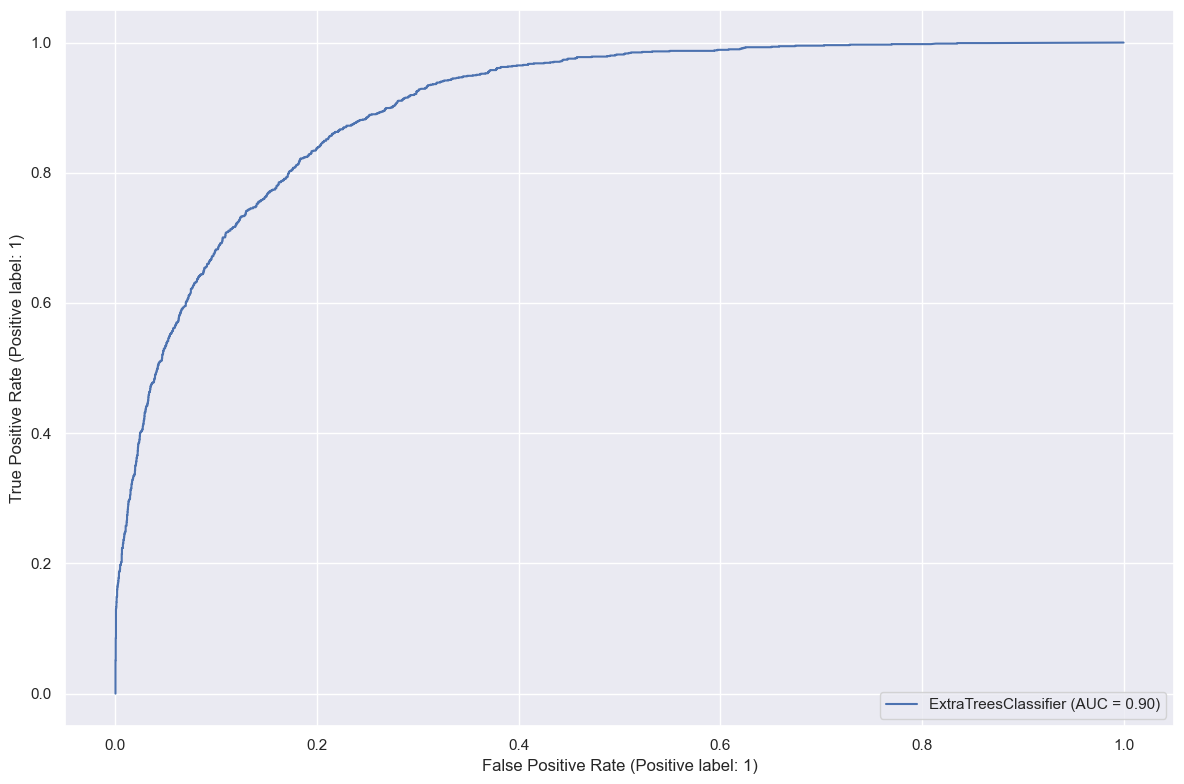

<Figure size 1000x1000 with 0 Axes>

Auc Score :
 0.7574846057535309


In [152]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [153]:
#Saving the model
import joblib
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']